In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [3]:
estimators= [('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('DT', DecisionTreeClassifier()), ('SVM', SVC()), ('KNN', KNeighborsClassifier()), ('LR', LogisticRegression()), ('LGBM', LGBMClassifier())]
stack = StackingClassifier( estimators=estimators, final_estimator= LogisticRegression())


#**AAC_IL13**

In [4]:
AAC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/AAC_Train.csv')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
AAC_ILTrain.dtypes

AAC1      float64
AAC2      float64
AAC3      float64
AAC4      float64
AAC5      float64
AAC6      float64
AAC7      float64
AAC8      float64
AAC9      float64
AAC10     float64
AAC11     float64
AAC12     float64
AAC13     float64
AAC14     float64
AAC15     float64
AAC16     float64
AAC17     float64
AAC18     float64
AAC19     float64
AAC20     float64
Target      int64
dtype: object

In [6]:
for column in AAC_ILTrain.columns:
  if column == 'Target':
    AAC_ILTrain[column] = AAC_ILTrain[column].astype('category')
  AAC_ILTrain[column] = pd.to_numeric(AAC_ILTrain[column], errors='coerce')
  if column == 'Target':
    AAC_ILTrain[column] = AAC_ILTrain[column].astype('category')
AAC_ILTrain.fillna(0, inplace=True)

In [7]:
X = AAC_ILTrain.drop(['Target'], axis=1)
y = AAC_ILTrain.Target
AAC_ILTrain_Metrics = []
AAC_ILTrain_Metrics = pd.DataFrame(AAC_ILTrain_Metrics)
AAC_ILTrain_Metrics['Classifier'] = 'Classifier'
AAC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
AAC_ILTrain_Metrics['mcc'] = 'mcc'
AAC_ILTrain_Metrics['auc'] = 'auc'
AAC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
AAC_ILTrain_Metrics['specificity'] = 'specificity'

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model

models = [LogisticRegression(penalty='l2',tol=0.0006, 
                           C=3, fit_intercept=True, intercept_scaling=1.0, 
                           class_weight=None, random_state=10),
          RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',random_state=10),
          SVC(probability=True),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]

for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv
                             =cv, n_jobs=-1)
  y_proba = cross_val_predict(model, X, y, cv
                             =cv, method='predict_proba')
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  AAC_ILTrain_Metrics.loc[len(AAC_ILTrain_Metrics.index)] = [model,Accuracy, mcc, auc, sensitivity,specificity]

print(AAC_ILTrain_Metrics)
AAC_ILTrain_Metrics.to_csv("AAC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("AAC_ILTrain_Probability.csv")

                                          Classifier  Accuracy       mcc  \
0  LogisticRegression(C=3, intercept_scaling=1.0,...  0.902950  0.000000   
1  RandomForestClassifier(criterion='entropy', ra...  0.913043  0.306580   
2                              SVC(probability=True)  0.904503  0.120290   
3  XGBClassifier(base_score=None, booster=None, c...  0.913043  0.371808   
4                           DecisionTreeClassifier()  0.864519  0.247266   
5                             KNeighborsClassifier()  0.896351  0.133893   
6                                   LGBMClassifier()  0.914596  0.371662   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.921584  0.430396   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.557355     0.998710        0.116  
2  0.508000     1.000000        0.016  
3  0.626972     0.981943        0.272  
4  0.626877     0.921754        0.332  
5  0.533831     0.983663        0.084  
6  0.618906     0.985813        0.2

In [35]:
AAC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,"LogisticRegression(C=3, intercept_scaling=1.0,...",0.902950,0.000000,0.500000,1.000000,0.000
1,"RandomForestClassifier(criterion='entropy', ra...",0.913043,0.306580,0.557355,0.998710,0.116
2,SVC(probability=True),0.904503,0.120290,0.508000,1.000000,0.016
3,"XGBClassifier(base_score=None, booster=None, c...",0.913043,0.371808,0.626972,0.981943,0.272
4,DecisionTreeClassifier(),0.864519,0.247266,0.626877,0.921754,0.332
5,KNeighborsClassifier(),0.896351,0.133893,0.533831,0.983663,0.084
6,LGBMClassifier(),0.914596,0.371662,0.618906,0.985813,0.252
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.921584,0.430396,0.633486,0.990972,0.276


In [ ]:
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)

In [ ]:
pd.DataFrame(prob).to_csv("AAC_Probability.csv")

#**APAAC_IL13**

In [8]:
APAAC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/APAAC_Train.csv')

for column in APAAC_ILTrain.columns:
  APAAC_ILTrain[column] = pd.to_numeric(APAAC_ILTrain[column], errors='coerce')
  if column == 'Target':
    APAAC_ILTrain[column] = APAAC_ILTrain[column].astype('category')
    
APAAC_ILTrain.fillna(0, inplace=True)
APAAC_ILTrain.dtypes

APAAC1      float64
APAAC2      float64
APAAC3      float64
APAAC4      float64
APAAC5      float64
APAAC6      float64
APAAC7      float64
APAAC8      float64
APAAC9      float64
APAAC10     float64
APAAC11     float64
APAAC12     float64
APAAC13     float64
APAAC14     float64
APAAC15     float64
APAAC16     float64
APAAC17     float64
APAAC18     float64
APAAC19     float64
APAAC20     float64
APAAC21     float64
APAAC22     float64
APAAC23     float64
APAAC24     float64
Target     category
dtype: object

In [9]:
X = APAAC_ILTrain.drop(['Target'], axis=1)
y = APAAC_ILTrain.Target
APAAC_ILTrain_Metrics = []
APAAC_ILTrain_Metrics = pd.DataFrame(APAAC_ILTrain_Metrics)
APAAC_ILTrain_Metrics['Classifier'] = 'Classifier'
APAAC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
APAAC_ILTrain_Metrics['mcc'] = 'mcc'
APAAC_ILTrain_Metrics['auc'] = 'auc'
APAAC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
APAAC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  APAAC_ILTrain_Metrics.loc[len(APAAC_ILTrain_Metrics.index)] = [model,Accuracy, mcc, auc, sensitivity, specificity]

print(APAAC_ILTrain_Metrics)
APAAC_ILTrain_Metrics.to_csv("APAAC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("APAAC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.906056  0.180172   
1                           RandomForestClassifier()  0.906444  0.180611   
2                                              SVC()  0.909550  0.248613   
3  XGBClassifier(base_score=None, booster=None, c...  0.908385  0.247728   
4                           DecisionTreeClassifier()  0.850543  0.183928   
5                             KNeighborsClassifier()  0.909550  0.256039   
6                                   LGBMClassifier()  0.908385  0.235542   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.916149  0.351882   

        auc  sensitivity  specificity  
0  0.526710     0.997420        0.056  
1  0.518000     1.000000        0.036  
2  0.534000     1.000000        0.068  
3  0.552991     0.993981        0.112  
4  0.595933     0.911866        0.280  
5  0.550065     0.996131        0.104  
6  0.544065     0.996131        0.0

In [10]:
APAAC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.906056,0.180172,0.526710,0.997420,0.056
1,RandomForestClassifier(),0.906444,0.180611,0.518000,1.000000,0.036
2,SVC(),0.909550,0.248613,0.534000,1.000000,0.068
3,"XGBClassifier(base_score=None, booster=None, c...",0.908385,0.247728,0.552991,0.993981,0.112
4,DecisionTreeClassifier(),0.850543,0.183928,0.595933,0.911866,0.280
5,KNeighborsClassifier(),0.909550,0.256039,0.550065,0.996131,0.104
6,LGBMClassifier(),0.908385,0.235542,0.544065,0.996131,0.092
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.916149,0.351882,0.578710,0.997420,0.160


#**CKSAAP_IL13**

In [11]:
CKSAAP_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP_Train.csv')

for column in CKSAAP_ILTrain.columns:
  CKSAAP_ILTrain[column] = pd.to_numeric(CKSAAP_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_ILTrain[column] = CKSAAP_ILTrain[column].astype('category')
    
CKSAAP_ILTrain.fillna(0, inplace=True)
CKSAAP_ILTrain.dtypes

CKSAAP1        float64
CKSAAP2        float64
CKSAAP3        float64
CKSAAP4        float64
CKSAAP5        float64
                ...   
CKSAAP1597     float64
CKSAAP1598     float64
CKSAAP1599     float64
CKSAAP1600     float64
Target        category
Length: 1601, dtype: object

In [12]:
X = CKSAAP_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_ILTrain.Target

CKSAAP_ILTrain_Metrics = []
CKSAAP_ILTrain_Metrics = pd.DataFrame(CKSAAP_ILTrain_Metrics)
CKSAAP_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_ILTrain_Metrics.loc[len(CKSAAP_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc,sensitivity,specificity]

print(CKSAAP_ILTrain_Metrics)
CKSAAP_ILTrain_Metrics.to_csv("CKSAAP_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.905668  0.161717   
2                                              SVC()  0.904891  0.136161   
3  XGBClassifier(base_score=None, booster=None, c...  0.912267  0.326289   
4                           DecisionTreeClassifier()  0.871118  0.223577   
5                             KNeighborsClassifier()  0.290761  0.095978   
6                                   LGBMClassifier()  0.914596  0.351858   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.917314  0.384278   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.519355     0.998710        0.040  
2  0.513570     0.999140        0.028  
3  0.590841     0.989682        0.192  
4  0.605541     0.935082        0.276  
5  0.566210     0.224420        0.908  
6  0.599271     0.990542        0.2

In [13]:
CKSAAP_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905668,0.161717,0.519355,0.998710,0.040
2,SVC(),0.904891,0.136161,0.513570,0.999140,0.028
3,"XGBClassifier(base_score=None, booster=None, c...",0.912267,0.326289,0.590841,0.989682,0.192
4,DecisionTreeClassifier(),0.871118,0.223577,0.605541,0.935082,0.276
5,KNeighborsClassifier(),0.290761,0.095978,0.566210,0.224420,0.908
6,LGBMClassifier(),0.914596,0.351858,0.599271,0.990542,0.208
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.917314,0.384278,0.613271,0.990542,0.236


#**TPC_IL13**

In [14]:
TPC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/TPC_Train.csv')

for column in TPC_ILTrain.columns:
  TPC_ILTrain[column] = pd.to_numeric(TPC_ILTrain[column], errors='coerce')
  if column == 'Target':
    TPC_ILTrain[column] = TPC_ILTrain[column].astype('category')
    
TPC_ILTrain.fillna(0, inplace=True)
TPC_ILTrain.dtypes

TPC1        float64
TPC2        float64
TPC3        float64
TPC4        float64
TPC5        float64
             ...   
TPC7997     float64
TPC7998     float64
TPC7999       int64
TPC8000     float64
Target     category
Length: 8001, dtype: object

In [15]:
X = TPC_ILTrain.drop(['Target'], axis=1)
y = TPC_ILTrain.Target

TPC_ILTrain_Metrics = []
TPC_ILTrain_Metrics = pd.DataFrame(TPC_ILTrain_Metrics)
TPC_ILTrain_Metrics['Classifier'] = 'Classifier'
TPC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
TPC_ILTrain_Metrics['mcc'] = 'mcc'
TPC_ILTrain_Metrics['auc'] = 'auc'
TPC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
TPC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  TPC_ILTrain_Metrics.loc[len(TPC_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity,specificity]

print(TPC_ILTrain_Metrics)
TPC_ILTrain_Metrics.to_csv("TPC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("TPC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.911879  0.288538   
2                                              SVC()  0.904503  0.123111   
3  XGBClassifier(base_score=None, booster=None, c...  0.902562  0.167872   
4                           DecisionTreeClassifier()  0.880047  0.254546   
5                             KNeighborsClassifier()  0.224767  0.098118   
6                                   LGBMClassifier()  0.902174  0.038567   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.922748  0.432227   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.553140     0.998280        0.108  
2  0.511570     0.999140        0.024  
3  0.535486     0.990972        0.080  
4  0.615840     0.943680        0.288  
5  0.556442     0.144884        0.968  
6  0.503140     0.998280        0.0

In [16]:
TPC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.911879,0.288538,0.553140,0.998280,0.108
2,SVC(),0.904503,0.123111,0.511570,0.999140,0.024
3,"XGBClassifier(base_score=None, booster=None, c...",0.902562,0.167872,0.535486,0.990972,0.080
4,DecisionTreeClassifier(),0.880047,0.254546,0.615840,0.943680,0.288
5,KNeighborsClassifier(),0.224767,0.098118,0.556442,0.144884,0.968
6,LGBMClassifier(),0.902174,0.038567,0.503140,0.998280,0.008
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.922748,0.432227,0.614495,0.996991,0.232


#**CTDC_IL13**

In [17]:
CTDC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC_Train.csv')

for column in CTDC_ILTrain.columns:
  CTDC_ILTrain[column] = pd.to_numeric(CTDC_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_ILTrain[column] = CTDC_ILTrain[column].astype('category')
    
CTDC_ILTrain.fillna(0, inplace=True)
CTDC_ILTrain.dtypes

CTDC1      float64
CTDC2      float64
CTDC3      float64
CTDC4      float64
CTDC5      float64
CTDC6      float64
CTDC7      float64
CTDC8      float64
CTDC9      float64
CTDC10     float64
CTDC11     float64
CTDC12     float64
CTDC13     float64
CTDC14     float64
CTDC15     float64
CTDC16     float64
CTDC17     float64
CTDC18     float64
CTDC19     float64
CTDC20     float64
CTDC21     float64
CTDC22     float64
CTDC23     float64
CTDC24     float64
CTDC25     float64
CTDC26     float64
CTDC27     float64
CTDC28     float64
CTDC29     float64
CTDC30     float64
CTDC31     float64
CTDC32     float64
CTDC33     float64
CTDC34     float64
CTDC35     float64
CTDC36     float64
CTDC37     float64
CTDC38     float64
CTDC39     float64
Target    category
dtype: object

In [18]:
X = CTDC_ILTrain.drop(['Target'], axis=1)
y = CTDC_ILTrain.Target

CTDC_ILTrain_Metrics = []
CTDC_ILTrain_Metrics = pd.DataFrame(CTDC_ILTrain_Metrics)
CTDC_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_ILTrain_Metrics['auc'] = 'auc'
CTDC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_ILTrain_Metrics.loc[len(CTDC_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_ILTrain_Metrics)
CTDC_ILTrain_Metrics.to_csv("CTDC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.186304   
2                                              SVC()  0.902950  0.000000   
3  XGBClassifier(base_score=None, booster=None, c...  0.914596  0.367960   
4                           DecisionTreeClassifier()  0.845109  0.177135   
5                             KNeighborsClassifier()  0.900621  0.139134   
6                                   LGBMClassifier()  0.912655  0.343213   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914596  0.351858   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.526925     0.997850        0.056  
2  0.500000     1.000000        0.000  
3  0.615336     0.986672        0.244  
4  0.594709     0.905417        0.284  
5  0.529056     0.990112        0.068  
6  0.603551     0.987102        0.2

In [19]:
CTDC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.186304,0.526925,0.997850,0.056
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,"XGBClassifier(base_score=None, booster=None, c...",0.914596,0.367960,0.615336,0.986672,0.244
4,DecisionTreeClassifier(),0.845109,0.177135,0.594709,0.905417,0.284
5,KNeighborsClassifier(),0.900621,0.139134,0.529056,0.990112,0.068
6,LGBMClassifier(),0.912655,0.343213,0.603551,0.987102,0.220
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914596,0.351858,0.599271,0.990542,0.208


#**CTriad_IL13**

In [20]:
CTriad_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid_Train.csv')

for column in CTriad_ILTrain.columns:
  CTriad_ILTrain[column] = pd.to_numeric(CTriad_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTriad_ILTrain[column] = CTriad_ILTrain[column].astype('category')
    
CTriad_ILTrain.fillna(0, inplace=True)
CTriad_ILTrain.dtypes

CTraid1       float64
CTraid2       float64
CTraid3       float64
CTraid4       float64
CTraid5       float64
               ...   
CTraid340     float64
CTraid341       int64
CTraid342       int64
CTraid343       int64
Target       category
Length: 344, dtype: object

In [21]:
X = CTriad_ILTrain.drop(['Target'], axis=1)
y = CTriad_ILTrain.Target

CTriad_ILTrain_Metrics = []
CTriad_ILTrain_Metrics = pd.DataFrame(CTriad_ILTrain_Metrics)
CTriad_ILTrain_Metrics['Classifier'] = 'Classifier'
CTriad_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTriad_ILTrain_Metrics['mcc'] = 'mcc'
CTriad_ILTrain_Metrics['auc'] = 'auc'
CTriad_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTriad_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTriad_ILTrain_Metrics.loc[len(CTriad_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTriad_ILTrain_Metrics)
CTriad_ILTrain_Metrics.to_csv("CTriad_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTriad_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.899457  0.120443   
1                           RandomForestClassifier()  0.904503  0.145671   
2                                              SVC()  0.902950  0.000000   
3  XGBClassifier(base_score=None, booster=None, c...  0.905668  0.202896   
4                           DecisionTreeClassifier()  0.848602  0.133071   
5                             KNeighborsClassifier()  0.901009  0.079022   
6                                   LGBMClassifier()  0.905668  0.213178   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.905668  0.192324   

        auc  sensitivity  specificity  
0  0.524841     0.989682        0.060  
1  0.520495     0.996991        0.044  
2  0.500000     1.000000        0.000  
3  0.540776     0.993551        0.088  
4  0.566298     0.916595        0.216  
5  0.511420     0.994841        0.028  
6  0.546131     0.992261        0.1

In [22]:
CTriad_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.899457,0.120443,0.524841,0.989682,0.060
1,RandomForestClassifier(),0.904503,0.145671,0.520495,0.996991,0.044
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,"XGBClassifier(base_score=None, booster=None, c...",0.905668,0.202896,0.540776,0.993551,0.088
4,DecisionTreeClassifier(),0.848602,0.133071,0.566298,0.916595,0.216
5,KNeighborsClassifier(),0.901009,0.079022,0.511420,0.994841,0.028
6,LGBMClassifier(),0.905668,0.213178,0.546131,0.992261,0.100
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.905668,0.192324,0.535420,0.994841,0.076


#**DPC_IL13**

In [23]:
DPC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC_Train.csv')

for column in DPC_ILTrain.columns:
  DPC_ILTrain[column] = pd.to_numeric(DPC_ILTrain[column], errors='coerce')
  if column == 'Target':
    DPC_ILTrain[column] = DPC_ILTrain[column].astype('category')
    
DPC_ILTrain.fillna(0, inplace=True)
DPC_ILTrain.dtypes

DPC1       float64
DPC2       float64
DPC3       float64
DPC4       float64
DPC5       float64
            ...   
DPC397     float64
DPC398     float64
DPC399     float64
DPC400     float64
Target    category
Length: 401, dtype: object

In [24]:
X = DPC_ILTrain.drop(['Target'], axis=1)
y = DPC_ILTrain.Target

DPC_ILTrain_Metrics = []
DPC_ILTrain_Metrics = pd.DataFrame(DPC_ILTrain_Metrics)
DPC_ILTrain_Metrics['Classifier'] = 'Classifier'
DPC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
DPC_ILTrain_Metrics['mcc'] = 'mcc'
DPC_ILTrain_Metrics['auc'] = 'auc'
DPC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
DPC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  DPC_ILTrain_Metrics.loc[len(DPC_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(DPC_ILTrain_Metrics)
DPC_ILTrain_Metrics.to_csv("DPC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("DPC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.905280  0.172953   
2                                              SVC()  0.903339  0.074926   
3  XGBClassifier(base_score=None, booster=None, c...  0.911879  0.333773   
4                           DecisionTreeClassifier()  0.879270  0.274171   
5                             KNeighborsClassifier()  0.654891  0.200494   
6                                   LGBMClassifier()  0.911879  0.346380   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.918478  0.404776   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.528065     0.996131        0.060  
2  0.505570     0.999140        0.012  
3  0.599551     0.987102        0.212  
4  0.629690     0.939381        0.320  
5  0.664311     0.652623        0.676  
6  0.610261     0.984523        0.2

In [25]:
DPC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905280,0.172953,0.528065,0.996131,0.060
2,SVC(),0.903339,0.074926,0.505570,0.999140,0.012
3,"XGBClassifier(base_score=None, booster=None, c...",0.911879,0.333773,0.599551,0.987102,0.212
4,DecisionTreeClassifier(),0.879270,0.274171,0.629690,0.939381,0.320
5,KNeighborsClassifier(),0.654891,0.200494,0.664311,0.652623,0.676
6,LGBMClassifier(),0.911879,0.346380,0.610261,0.984523,0.236
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.918478,0.404776,0.628196,0.988392,0.268


#**Moran_IL13**

In [26]:
Moran_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/Moran_Train.csv')

for column in Moran_ILTrain.columns:
  Moran_ILTrain[column] = pd.to_numeric(Moran_ILTrain[column], errors='coerce')
  if column == 'Target':
    Moran_ILTrain[column] = Moran_ILTrain[column].astype('category')
    
Moran_ILTrain.fillna(0, inplace=True)
Moran_ILTrain.dtypes

Moran 1     float64
Moran 2     float64
Target     category
dtype: object

In [27]:
X = Moran_ILTrain.drop(['Target'], axis=1)
y = Moran_ILTrain.Target

Moran_ILTrain_Metrics = []
Moran_ILTrain_Metrics = pd.DataFrame(Moran_ILTrain_Metrics)
Moran_ILTrain_Metrics['Classifier'] = 'Classifier'
Moran_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Moran_ILTrain_Metrics['mcc'] = 'mcc'
Moran_ILTrain_Metrics['auc'] = 'auc'
Moran_ILTrain_Metrics['sensitivity'] = 'sensitivity'

Moran_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Moran_ILTrain_Metrics.loc[len(Moran_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Moran_ILTrain_Metrics)
Moran_ILTrain_Metrics.to_csv("Moran_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Moran_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.896351  0.010704   
2                                              SVC()  0.902950  0.000000   
3  XGBClassifier(base_score=None, booster=None, c...  0.891304 -0.005516   
4                           DecisionTreeClassifier()  0.832686  0.050438   
5                             KNeighborsClassifier()  0.894798 -0.005702   
6                                   LGBMClassifier()  0.893634  0.001082   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.000000   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.501701     0.991402        0.012  
2  0.500000     1.000000        0.000  
3  0.498906     0.985813        0.012  
4  0.525353     0.906707        0.144  
5  0.499056     0.990112        0.008  
6  0.500196     0.988392        0.0

In [28]:
Moran_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.896351,0.010704,0.501701,0.991402,0.012
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,"XGBClassifier(base_score=None, booster=None, c...",0.891304,-0.005516,0.498906,0.985813,0.012
4,DecisionTreeClassifier(),0.832686,0.050438,0.525353,0.906707,0.144
5,KNeighborsClassifier(),0.894798,-0.005702,0.499056,0.990112,0.008
6,LGBMClassifier(),0.893634,0.001082,0.500196,0.988392,0.012
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.000000,0.500000,1.000000,0.000


#**PAAC_IL13**

In [29]:
PAAC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/PAAC_Train.csv')

for column in PAAC_ILTrain.columns:
  PAAC_ILTrain[column] = pd.to_numeric(PAAC_ILTrain[column], errors='coerce')
  if column == 'Target':
    PAAC_ILTrain[column] = PAAC_ILTrain[column].astype('category')
    
PAAC_ILTrain.fillna(0, inplace=True)
PAAC_ILTrain.dtypes

PAAC1      float64
PAAC2      float64
PAAC3      float64
PAAC4      float64
PAAC5      float64
PAAC6      float64
PAAC7      float64
PAAC8      float64
PAAC9      float64
PAAC10     float64
PAAC11     float64
PAAC12     float64
PAAC13     float64
PAAC14     float64
PAAC15     float64
PAAC16     float64
PAAC17     float64
PAAC18     float64
PAAC19     float64
PAAC20     float64
PAAC21     float64
PAAC22     float64
Target    category
dtype: object

In [30]:
X = PAAC_ILTrain.drop(['Target'], axis=1)
y = PAAC_ILTrain.Target

PAAC_ILTrain_Metrics = []
PAAC_ILTrain_Metrics = pd.DataFrame(PAAC_ILTrain_Metrics)
PAAC_ILTrain_Metrics['Classifier'] = 'Classifier'
PAAC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
PAAC_ILTrain_Metrics['mcc'] = 'mcc'
PAAC_ILTrain_Metrics['auc'] = 'auc'
PAAC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
PAAC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  PAAC_ILTrain_Metrics.loc[len(PAAC_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(PAAC_ILTrain_Metrics)
PAAC_ILTrain_Metrics.to_csv("PAAC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("PAAC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.905668  0.185162   
1                           RandomForestClassifier()  0.906444  0.179639   
2                                              SVC()  0.909161  0.240128   
3  XGBClassifier(base_score=None, booster=None, c...  0.907220  0.233650   
4                           DecisionTreeClassifier()  0.840450  0.125703   
5                             KNeighborsClassifier()  0.907609  0.229081   
6                                   LGBMClassifier()  0.905668  0.195876   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914984  0.338347   

        auc  sensitivity  specificity  
0  0.531850     0.995701        0.068  
1  0.519785     0.999570        0.040  
2  0.533785     0.999570        0.068  
3  0.550561     0.993121        0.108  
4  0.565353     0.906707        0.224  
5  0.545420     0.994841        0.096  
6  0.537206     0.994411        0.0

In [31]:
PAAC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.905668,0.185162,0.531850,0.995701,0.068
1,RandomForestClassifier(),0.906444,0.179639,0.519785,0.999570,0.040
2,SVC(),0.909161,0.240128,0.533785,0.999570,0.068
3,"XGBClassifier(base_score=None, booster=None, c...",0.907220,0.233650,0.550561,0.993121,0.108
4,DecisionTreeClassifier(),0.840450,0.125703,0.565353,0.906707,0.224
5,KNeighborsClassifier(),0.907609,0.229081,0.545420,0.994841,0.096
6,LGBMClassifier(),0.905668,0.195876,0.537206,0.994411,0.080
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914984,0.338347,0.578065,0.996131,0.160


#**PseNaRAAC_IL13**

In [32]:
PseKRAAC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/PsekRAAC_Train.csv')

for column in PseKRAAC_ILTrain.columns:
  PseKRAAC_ILTrain[column] = pd.to_numeric(PseKRAAC_ILTrain[column], errors='coerce')
  if column == 'Target ':
    PseKRAAC_ILTrain[column] = PseKRAAC_ILTrain[column].astype('category')
    
PseKRAAC_ILTrain.fillna(0, inplace=True)
PseKRAAC_ILTrain.dtypes

PsecRAAC1    int64
PsecRAAC2    int64
PsecRAAC3    int64
PsecRAAC4    int64
Target       int64
dtype: object

In [33]:
X = PseKRAAC_ILTrain.drop(['Target'], axis=1)
y = PseKRAAC_ILTrain['Target']

PseKRAAC_ILTrain_Metrics = []
PseKRAAC_ILTrain_Metrics = pd.DataFrame(PseKRAAC_ILTrain_Metrics)
PseKRAAC_ILTrain_Metrics['Classifier'] = 'Classifier'
PseKRAAC_ILTrain_Metrics['Accuracy'] = 'Accuracy'
PseKRAAC_ILTrain_Metrics['mcc'] = 'mcc'
PseKRAAC_ILTrain_Metrics['auc'] = 'auc'
PseKRAAC_ILTrain_Metrics['sensitivity'] = 'sensitivity'
PseKRAAC_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  PseKRAAC_ILTrain_Metrics.loc[len(PseKRAAC_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(PseKRAAC_ILTrain_Metrics)
PseKRAAC_ILTrain_Metrics.to_csv("PseKRAAC_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("PseKRAAC_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.908773  0.233440   
1                           RandomForestClassifier()  0.906056  0.313434   
2                                              SVC()  0.909550  0.248613   
3  XGBClassifier(base_score=None, booster=None, c...  0.909161  0.308980   
4                           DecisionTreeClassifier()  0.909550  0.332407   
5                             KNeighborsClassifier()  0.906444  0.241880   
6                                   LGBMClassifier()  0.906056  0.279446   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.912655  0.312763   

        auc  sensitivity  specificity  
0  0.530000     1.000000        0.060  
1  0.607037     0.978074        0.236  
2  0.534000     1.000000        0.068  
3  0.592691     0.985383        0.200  
4  0.608972     0.981943        0.236  
5  0.559056     0.990112        0.128  
6  0.583831     0.983663        0.1

In [34]:
PseKRAAC_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.908773,0.233440,0.530000,1.000000,0.060
1,RandomForestClassifier(),0.906056,0.313434,0.607037,0.978074,0.236
2,SVC(),0.909550,0.248613,0.534000,1.000000,0.068
3,"XGBClassifier(base_score=None, booster=None, c...",0.909161,0.308980,0.592691,0.985383,0.200
4,DecisionTreeClassifier(),0.909550,0.332407,0.608972,0.981943,0.236
5,KNeighborsClassifier(),0.906444,0.241880,0.559056,0.990112,0.128
6,LGBMClassifier(),0.906056,0.279446,0.583831,0.983663,0.184
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.912655,0.312763,0.574991,0.993981,0.156


#**Combined (DATASET) Recursive Shaply Value (Feature Selection) **

In [ ]:
!pip install SHAP
!pip install probatus
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.4/352.4 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shap: filename=shap-0.38.1-cp38-cp38-linux_x86_64.whl size=537242 sha256=2d5f37b36b7d08c3b939be8fa4ea2331c15f0234cf21dc5d63ef49ea064d49d2
  Stored in directory: /root/.cache/pip/wheels/87/7c/3f/1012132e5a8db6b4e125e64be0fd96f581803e101b0403c65f
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.41.0
    Uninstalling shap-0.41.0:
      Successfully uninstalled shap-0.41.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

In [ ]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
Combined_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/Combined_Train.csv')
for column in Combined_ILTrain.columns:
  Combined_ILTrain[column] = pd.to_numeric(Combined_ILTrain[column], errors='coerce')
  if column == 'Target ':
    Combined_ILTrain[column] = Combined_ILTrain[column].astype('category')
    
Combined_ILTrain.fillna(0, inplace=True)
Combined_ILTrain.dtypes

AAC1      float64
AAC2      float64
AAC3      float64
AAC4      float64
AAC5      float64
           ...   
DPC397    float64
DPC398    float64
DPC399    float64
DPC400    float64
Target      int64
Length: 2045, dtype: object

In [ ]:
import shap as SHAP
Combined_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/Combined_Train.csv')


In [ ]:
feature_names = list(Combined_ILTrain.columns.values.tolist())


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2075, class_sep=0.05, n_informative=6, n_features=2045,
                           random_state=0, n_redundant=10, n_clusters_per_class=1)
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
feature_names = Combined_ILTrain.columns

In [ ]:
X[feature_names[:5]].head()


,AAC1,AAC2,AAC3,AAC4,AAC5
0,0.931861,0.674573,-0.706566,0.876281,-0.449557
1,-0.393106,-0.297396,-1.300101,-1.189145,-1.072629
2,-0.632894,0.234334,-0.201006,1.396590,-1.647576
3,0.770018,-0.048669,0.763357,-1.144618,0.950197
4,0.626735,-0.318791,-0.865035,-0.869667,0.013746


# **LGBMC**

In [ ]:
clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.921
2,1636,"[DPC37, CKSAAP1528, CKSAAP646, CKSAAP585, CKSA...",0.904
3,1309,"[DPC37, CKSAAP1528, CKSAAP646, CKSAAP1568, DPC...",0.922
4,1048,"[DPC37, CKSAAP1528, DPC374, AAC10, CKSAAP199, ...",0.922
5,839,"[CKSAAP1528, DPC374, AAC10, CKSAAP199, CKSAAP7...",0.922
6,672,"[CKSAAP266, CKSAAP1528, CKSAAP1388, CKSAAP386,...",0.904
7,538,"[CKSAAP266, CKSAAP1528, CKSAAP386, DPC374, CKS...",0.904
8,431,"[CKSAAP266, CKSAAP386, DPC374, CKSAAP445, CKSA...",0.904
9,345,"[CKSAAP266, DPC374, CKSAAP445, CKSAAP28, AAC10...",0.904
10,276,"[CKSAAP266, CKSAAP445, CKSAAP28, AAC10, CKSAAP...",0.904


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('LGBMClassifier.csv')

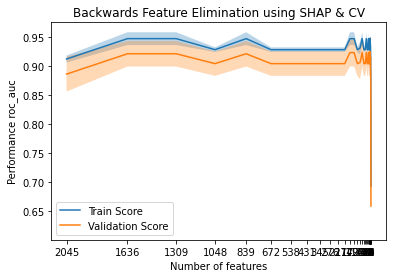

In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

In [ ]:
shap_elimination.get_reduced_features_set(num_features=10)


['CKSAAP1028',
 'CKSAAP713',
 'CKSAAP89',
 'CKSAAP61',
 'CKSAAP596',
 'DPC345',
 'CKSAAP468',
 'CKSAAP27',
 'DPC351',
 'CKSAAP757']

# **RF CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=2)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.800
2,1636,"[DPC37, CKSAAP646, CKSAAP585, CKSAAP1568, DPC3...",0.810
3,1309,"[CKSAAP585, CKSAAP1568, DPC374, AAC10, CKSAAP1...",0.812
4,1048,"[CKSAAP585, CKSAAP1568, DPC374, AAC10, CKSAAP1...",0.814
5,839,"[CKSAAP585, CKSAAP1568, DPC374, AAC10, CKSAAP1...",0.811
6,672,"[CKSAAP266, CKSAAP386, CKSAAP585, CKSAAP1568, ...",0.810
7,538,"[CKSAAP266, CKSAAP585, CKSAAP1568, DPC374, CKS...",0.813
8,431,"[CKSAAP266, CKSAAP585, DPC374, CKSAAP445, CKSA...",0.815
9,345,"[CKSAAP445, CKSAAP28, AAC10, CKSAAP1235, DPC36...",0.812
10,276,"[CKSAAP445, CKSAAP756, CKSAAP1488, CKSAAP355, ...",0.818


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('RandomForestClassifier.csv')

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

In [ ]:
shap_elimination.get_reduced_features_set(num_features=10)


# **LR**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression(tol=0.0001, C=1.0)

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.494
2,1636,"[CKSAAP86, CKSAAP646, CKSAAP1568, DPC374, CKSA...",0.596
3,1309,"[CKSAAP86, CKSAAP646, CKSAAP1568, DPC374, CKSA...",0.741
4,1048,"[CKSAAP86, CKSAAP646, CKSAAP1568, CKSAAP143, C...",0.852
5,839,"[CKSAAP86, CKSAAP646, CKSAAP1568, CKSAAP143, C...",0.901
6,672,"[CKSAAP1160, CKSAAP86, CKSAAP646, CKSAAP1568, ...",0.911
7,538,"[CKSAAP86, CKSAAP649, CKSAAP1568, CKSAAP646, C...",0.899
8,431,"[CKSAAP86, CKSAAP1568, CKSAAP649, CKSAAP445, C...",0.869
9,345,"[CKSAAP86, CKSAAP649, CKSAAP445, CKSAAP1009, C...",0.839
10,276,"[CKSAAP86, CKSAAP649, CKSAAP445, CKSAAP1009, C...",0.821


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('LogisticRegression.csv')

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

In [ ]:
shap_elimination.get_reduced_features_set(num_features=10)


# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=0.2, kernel='linear', degree=3)

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.492
2,1636,"[CKSAAP86, CKSAAP646, CKSAAP1568, DPC374, CKSA...",0.600
3,1309,"[CKSAAP86, CKSAAP646, CKSAAP1568, DPC374, CKSA...",0.757
4,1048,"[CKSAAP86, CKSAAP646, CKSAAP1568, DPC374, CKSA...",0.861
5,839,"[CKSAAP86, CKSAAP646, CKSAAP1568, CKSAAP143, C...",0.899
6,672,"[CKSAAP1160, CKSAAP86, CKSAAP646, CKSAAP1568, ...",0.900
7,538,"[CKSAAP86, CKSAAP649, CKSAAP1568, CKSAAP646, C...",0.893
8,431,"[CKSAAP86, CKSAAP646, CKSAAP1568, CKSAAP649, C...",0.864
9,345,"[CKSAAP649, CKSAAP1568, CKSAAP646, CKSAAP445, ...",0.835
10,276,"[CKSAAP1568, CKSAAP649, CKSAAP1523, CKSAAP978,...",0.803


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SVCFfile.csv')

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

In [ ]:
shap_elimination.get_reduced_features_set(num_features=10)


# **XGB CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier


In [ ]:
clf = XGBClassifier(C=0.2, kernel='linear', degree=3)
param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.945
2,1636,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP646, CKSAA...",0.945
3,1309,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP646, CKSAA...",0.945
4,1048,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP646, CKSAA...",0.943
5,839,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, DPC3...",0.947
6,672,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, CKSA...",0.950
7,538,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, CKSA...",0.950
8,431,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, CKSA...",0.951
9,345,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, DPC1...",0.949
10,276,"[DPC37, CKSAAP1528, CKSAAP86, CKSAAP1568, DPC1...",0.949


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('XGBClassifier.csv')

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

# **DT CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,2045,"[AAC1, AAC2, AAC3, AAC4, AAC5, AAC6, AAC7, AAC...",0.808
2,1636,"[DPC37, CKSAAP86, CKSAAP585, CKSAAP1568, DPC37...",0.809
3,1309,"[DPC37, CKSAAP86, CKSAAP585, CKSAAP1568, DPC37...",0.814
4,1048,"[DPC37, CKSAAP585, CKSAAP1568, DPC374, AAC10, ...",0.816
5,839,"[CKSAAP585, CKSAAP1568, DPC374, AAC10, CKSAAP1...",0.825
6,672,"[CKSAAP266, CKSAAP1568, DPC374, CKSAAP445, CKS...",0.812
7,538,"[DPC374, CKSAAP445, CKSAAP28, AAC10, CKSAAP148...",0.813
8,431,"[CKSAAP445, CKSAAP28, AAC10, CKSAAP1488, CKSAA...",0.814
9,345,"[CKSAAP445, CKSAAP756, CKSAAP355, CKSAAP1488, ...",0.814
10,276,"[CKSAAP445, CKSAAP756, CKSAAP355, CKSAAP1488, ...",0.808


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('DecisionTreeClassifier.csv')

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

performance_plot = shap_elimination.plot()

# **RECURSIVE SHAPLY VALUE FEATURE SELECTION DONE**

# **COMBINED Selected Features ML Model FROM ALL DATA SET BY RECURSIVE SHAPLY VALUE**

In [ ]:
SF_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/Combined Final Selected Features.csv')

for column in SF_ILTrain.columns:
  SF_ILTrain[column] = pd.to_numeric(SF_ILTrain[column], errors='coerce')
  if column == 'Target':
    SF_ILTrain[column] = SF_ILTrain[column].astype('category')
    
SF_ILTrain.fillna(0, inplace=True)
SF_ILTrain.dtypes

AAC6       float64
AAC11      float64
AAC13      float64
APAAC5     float64
APAAC6     float64
            ...   
DPC385     float64
DPC386     float64
DPC388     float64
DPC396     float64
Target    category
Length: 468, dtype: object

In [ ]:
X = SF_ILTrain.drop(['Target'], axis=1)
y = SF_ILTrain.Target

SF_ILTrain_Metrics = []
SF_ILTrain_Metrics = pd.DataFrame(SF_ILTrain_Metrics)
SF_ILTrain_Metrics['Classifier'] = 'Classifier'
SF_ILTrain_Metrics['Accuracy'] = 'Accuracy'
SF_ILTrain_Metrics['mcc'] = 'mcc'
SF_ILTrain_Metrics['auc'] = 'auc'
SF_ILTrain_Metrics['sensitivity'] = 'sensitivity'
SF_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  SF_ILTrain_Metrics.loc[len(SF_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(SF_ILTrain_Metrics)
SF_ILTrain_Metrics.to_csv("SF_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("SF_ILTrain_Probability.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902562 -0.006461   
1                           RandomForestClassifier()  0.906444  0.180223   
2                                              SVC()  0.904503  0.120290   
3                                    XGBClassifier()  0.907609  0.213903   
4                           DecisionTreeClassifier()  0.867236  0.220359   
5                             KNeighborsClassifier()  0.901398  0.111209   
6                                   LGBMClassifier()  0.918478  0.400388   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.921972  0.432344   

        auc  sensitivity  specificity  
0  0.499785     0.999570        0.000  
1  0.521570     0.999140        0.044  
2  0.508000     1.000000        0.016  
3  0.534710     0.997420        0.072  
4  0.606961     0.929923        0.284  
5  0.518776     0.993551        0.044  
6  0.622841     0.989682        0.2

In [ ]:
SF_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902562,-0.006461,0.499785,0.999570,0.000
1,RandomForestClassifier(),0.906444,0.180223,0.521570,0.999140,0.044
2,SVC(),0.904503,0.120290,0.508000,1.000000,0.016
3,XGBClassifier(),0.907609,0.213903,0.534710,0.997420,0.072
4,DecisionTreeClassifier(),0.867236,0.220359,0.606961,0.929923,0.284
5,KNeighborsClassifier(),0.901398,0.111209,0.518776,0.993551,0.044
6,LGBMClassifier(),0.918478,0.400388,0.622841,0.989682,0.256
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.921972,0.432344,0.631916,0.991831,0.272


# **INDIVIDUAL DATA SET FEATURE SELECTION START**

# **CKSAAP FEATURE SELECTION**

In [ ]:
!pip install SHAP
!pip install probatus
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 30.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.4/352.4 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shap: filename=shap-0.38.1-cp310-cp310-linux_x86_64.whl size=533948 sha256=7608c60e4e2ac8f74a1ac29bf07547044819d587fe6b39dc1155c385f43f46b5
  Stored in directory: /root/.cache/pip/wheels/0c/d7/54/266e609c1229cc4160522eb7d5fe6cb3308ffffc8d0b13a52b
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.41.0
    Uninstalling shap-0.41.0:
      Successfully uninstalled shap-0.41.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whe

In [ ]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# **ALL Model FOR CKSAAP**

In [ ]:
SF_CKSAAP_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP_Train.csv')

for column in SF_CKSAAP_ILTrain.columns:
  SF_CKSAAP_ILTrain[column] = pd.to_numeric(SF_CKSAAP_ILTrain[column], errors='coerce')
  if column == 'Target ':
    SF_CKSAAP_ILTrain[column] = SF_CKSAAP_ILTrain[column].astype('category')
    
SF_CKSAAP_ILTrain.fillna(0, inplace=True)
SF_CKSAAP_ILTrain.dtypes

CKSAAP1       float64
CKSAAP2       float64
CKSAAP3       float64
CKSAAP4       float64
CKSAAP5       float64
               ...   
CKSAAP1597    float64
CKSAAP1598    float64
CKSAAP1599    float64
CKSAAP1600    float64
Target          int64
Length: 1601, dtype: object

In [ ]:
import shap as SHAP
SF_AAC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP_Train.csv')

In [ ]:
feature_names = list(SF_CKSAAP_ILTrain.columns.values.tolist())


In [ ]:
SF_CKSAAP_ILTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 1601 entries, CKSAAP1 to Target
dtypes: float64(1600), int64(1)
memory usage: 31.5 MB


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2575, class_sep=0.05, n_informative=6, n_features=1601,
                           random_state=0, n_redundant=10, n_clusters_per_class=1)
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
feature_names = SF_CKSAAP_ILTrain.columns

In [ ]:
X[feature_names[:5]].head()


,CKSAAP1,CKSAAP2,CKSAAP3,CKSAAP4,CKSAAP5
0,0.376411,0.054897,1.764886,1.831157,-0.224304
1,0.427289,-2.053714,-0.188483,0.304219,-1.861503
2,0.064988,-1.013770,-0.329543,0.422396,-1.196361
3,0.909391,-0.502778,0.231733,2.778789,-0.569741
4,-1.370937,1.318342,-1.441318,-1.154060,-0.290397


# **LGBM CLASSIFIER**

In [ ]:
clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.916
2,1281,"[CKSAAP784, CKSAAP227, CKSAAP217, CKSAAP554, C...",0.916
3,1025,"[CKSAAP784, CKSAAP217, CKSAAP554, CKSAAP327, C...",0.916
4,820,"[CKSAAP784, CKSAAP217, CKSAAP554, CKSAAP327, C...",0.916
5,656,"[CKSAAP784, Target, CKSAAP357, CKSAAP217, CKSA...",0.916
6,525,"[CKSAAP784, CKSAAP357, CKSAAP217, CKSAAP813, C...",0.916
7,420,"[CKSAAP784, CKSAAP357, CKSAAP217, CKSAAP813, C...",0.896
8,336,"[CKSAAP784, CKSAAP217, CKSAAP813, CKSAAP1314, ...",0.917
9,269,"[CKSAAP784, CKSAAP813, CKSAAP1314, CKSAAP554, ...",0.917
10,216,"[CKSAAP784, CKSAAP813, CKSAAP1314, CKSAAP202, ...",0.917


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LGBMClassifier.csv')

# **ML Model For Best Features of LGBM Classifier (CKSAAP)** 

# **LGBM FIRST SET**

In [ ]:
CKSAAP_LGBM_First_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_LGBMClassifier_CKSAAP_Train.csv')

for column in CKSAAP_LGBM_First_Set_ILTrain.columns:
  CKSAAP_LGBM_First_Set_ILTrain[column] = pd.to_numeric(CKSAAP_LGBM_First_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_LGBM_First_Set_ILTrain[column] = CKSAAP_LGBM_First_Set_ILTrain[column].astype('category')
    
CKSAAP_LGBM_First_Set_ILTrain.fillna(0, inplace=True)
CKSAAP_LGBM_First_Set_ILTrain.dtypes


CKSAAP288      float64
CKSAAP1186     float64
CKSAAP1599     float64
CKSAAP999      float64
CKSAAP16       float64
CKSAAP908      float64
CKSAAP517      float64
CKSAAP125      float64
CKSAAP745      float64
CKSAAP1071     float64
CKSAAP1453     float64
CKSAAP1100     float64
CKSAAP260      float64
CKSAAP1107     float64
CKSAAP950      float64
CKSAAP1109     float64
Target        category
dtype: object

In [ ]:
X = CKSAAP_LGBM_First_Set_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_LGBM_First_Set_ILTrain.Target

CKSAAP_LGBM_First_Set_ILTrain_Metrics = []
CKSAAP_LGBM_First_Set_ILTrain_Metrics = pd.DataFrame(CKSAAP_LGBM_First_Set_ILTrain_Metrics)
CKSAAP_LGBM_First_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_LGBM_First_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_LGBM_First_Set_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_LGBM_First_Set_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_LGBM_First_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_LGBM_First_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_LGBM_First_Set_ILTrain_Metrics.loc[len(CKSAAP_LGBM_First_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CKSAAP_LGBM_First_Set_ILTrain_Metrics)
CKSAAP_LGBM_First_Set_ILTrain_Metrics.to_csv("CKSAAP_LGBM_First_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_LGBM_First_Set_ILTrain_Metrics.csv")
print(prob)


NameError: ignored

In [ ]:
CKSAAP_LGBM_First_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905668,0.245239,0.563981,0.987962,0.140
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902174,-0.009139,0.499570,0.999140,0.000
4,DecisionTreeClassifier(),0.906444,0.250802,0.564411,0.988822,0.140
5,KNeighborsClassifier(),0.903339,0.165419,0.532346,0.992691,0.072
6,LGBMClassifier(),0.901398,0.090527,0.513420,0.994841,0.032
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.907997,0.235960,0.547420,0.994841,0.100


In [ ]:
CKSAAP_LGBM_First_Set_ILTrain_Metrics.to_csv('CKSAAP_LGBM_First_Set.csv')

# **LGBM SECOND SET**

In [ ]:
CKSAAP_LGBM_Second_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/Second_SF_LGBMClassifier_CKSAAP_Train.csv')

for column in CKSAAP_LGBM_Second_Set_ILTrain.columns:
  CKSAAP_LGBM_Second_Set_ILTrain[column] = pd.to_numeric(CKSAAP_LGBM_Second_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_LGBM_Second_Set_ILTrain[column] = CKSAAP_LGBM_Second_Set_ILTrain[column].astype('category')
    
CKSAAP_LGBM_Second_Set_ILTrain.fillna(0, inplace=True)
CKSAAP_LGBM_Second_Set_ILTrain.dtypes

CKSAAP288      float64
CKSAAP1599     float64
CKSAAP999      float64
CKSAAP16       float64
CKSAAP517      float64
CKSAAP125      float64
CKSAAP745      float64
CKSAAP1071     float64
CKSAAP1100     float64
CKSAAP260      float64
CKSAAP1107     float64
CKSAAP950      float64
CKSAAP1109     float64
Target        category
dtype: object

In [ ]:
X = CKSAAP_LGBM_Second_Set_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_LGBM_Second_Set_ILTrain.Target

CKSAAP_LGBM_Second_Set_ILTrain_Metrics = []
CKSAAP_LGBM_Second_Set_ILTrain_Metrics = pd.DataFrame(CKSAAP_LGBM_Second_Set_ILTrain_Metrics)
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_LGBM_Second_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_LGBM_Second_Set_ILTrain_Metrics.loc[len(CKSAAP_LGBM_Second_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CKSAAP_LGBM_Second_Set_ILTrain_Metrics)
CKSAAP_LGBM_Second_Set_ILTrain_Metrics.to_csv("CKSAAP_LGBM_Second_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_LGBM_Second_Set_ILTrain_Metrics.csv")
print(prob)


                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906832  0.242002   
2                                              SVC()  0.902562 -0.006461   
3                                    XGBClassifier()  0.901786 -0.011195   
4                           DecisionTreeClassifier()  0.908385  0.255449   
5                             KNeighborsClassifier()  0.902562  0.095557   
6                                   LGBMClassifier()  0.902950  0.084976   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.907609  0.226369   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.557486     0.990972        0.124  
2  0.499785     0.999570        0.000  
3  0.499355     0.998710        0.000  
4  0.558346     0.992691        0.124  
5  0.512280     0.996561        0.028  
6  0.508925     0.997850        0.0

In [ ]:
CKSAAP_LGBM_Second_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906832,0.242002,0.557486,0.990972,0.124
2,SVC(),0.902562,-0.006461,0.499785,0.999570,0.000
3,XGBClassifier(),0.901786,-0.011195,0.499355,0.998710,0.000
4,DecisionTreeClassifier(),0.908385,0.255449,0.558346,0.992691,0.124
5,KNeighborsClassifier(),0.902562,0.095557,0.512280,0.996561,0.028
6,LGBMClassifier(),0.902950,0.084976,0.508925,0.997850,0.020
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.907609,0.226369,0.543635,0.995271,0.092


In [ ]:
CKSAAP_LGBM_Second_Set_ILTrain_Metrics.to_csv('CKSAAP_LGBM_Second_Set.csv')

# **LGBM THIRD SET**

In [ ]:
CKSAAP_LGBM_Third_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/Third_SF_LGBMClassifier_CKSAAP_Train.csv')

for column in CKSAAP_LGBM_Third_Set_ILTrain.columns:
  CKSAAP_LGBM_Third_Set_ILTrain[column] = pd.to_numeric(CKSAAP_LGBM_Third_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_LGBM_Third_Set_ILTrain[column] = CKSAAP_LGBM_Third_Set_ILTrain[column].astype('category')
    
CKSAAP_LGBM_Third_Set_ILTrain.fillna(0, inplace=True)
CKSAAP_LGBM_Third_Set_ILTrain.dtypes

CKSAAP288      float64
CKSAAP1599     float64
CKSAAP999      float64
CKSAAP745      float64
CKSAAP16       float64
CKSAAP1100     float64
CKSAAP260      float64
CKSAAP1107     float64
CKSAAP950      float64
CKSAAP125      float64
CKSAAP517      float64
Target        category
dtype: object

In [ ]:
X = CKSAAP_LGBM_Third_Set_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_LGBM_Third_Set_ILTrain.Target

CKSAAP_LGBM_Third_Set_ILTrain_Metrics = []
CKSAAP_LGBM_Third_Set_ILTrain_Metrics = pd.DataFrame(CKSAAP_LGBM_Third_Set_ILTrain_Metrics)
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_LGBM_Third_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_LGBM_Third_Set_ILTrain_Metrics.loc[len(CKSAAP_LGBM_Third_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CKSAAP_LGBM_Third_Set_ILTrain_Metrics)
CKSAAP_LGBM_Third_Set_ILTrain_Metrics.to_csv("CKSAAP_LGBM_Third_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_LGBM_Third_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.905668  0.213178   
2                                              SVC()  0.901786 -0.011195   
3                                    XGBClassifier()  0.900621 -0.015841   
4                           DecisionTreeClassifier()  0.906832  0.223985   
5                             KNeighborsClassifier()  0.902174  0.063887   
6                                   LGBMClassifier()  0.902174  0.052407   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.906444  0.194947   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.546131     0.992261        0.100  
2  0.499355     0.998710        0.000  
3  0.498710     0.997420        0.000  
4  0.546776     0.993551        0.100  
5  0.506710     0.997420        0.016  
6  0.504925     0.997850        0.0

In [ ]:
CKSAAP_LGBM_Third_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905668,0.213178,0.546131,0.992261,0.100
2,SVC(),0.901786,-0.011195,0.499355,0.998710,0.000
3,XGBClassifier(),0.900621,-0.015841,0.498710,0.997420,0.000
4,DecisionTreeClassifier(),0.906832,0.223985,0.546776,0.993551,0.100
5,KNeighborsClassifier(),0.902174,0.063887,0.506710,0.997420,0.016
6,LGBMClassifier(),0.902174,0.052407,0.504925,0.997850,0.012
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.906444,0.194947,0.532280,0.996561,0.068


In [ ]:
CKSAAP_LGBM_Third_Set_ILTrain_Metrics.to_csv('CKSAAP_LGBM_Third_Set.csv')

# **LGBM FOURTH SET**

In [ ]:
CKSAAP_LGBM_Fourth_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/Fourth_SF_LGBMClassifier_CKSAAP_Train.csv')

for column in CKSAAP_LGBM_Fourth_Set_ILTrain.columns:
  CKSAAP_LGBM_Fourth_Set_ILTrain[column] = pd.to_numeric(CKSAAP_LGBM_Fourth_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_LGBM_Fourth_Set_ILTrain[column] = CKSAAP_LGBM_Fourth_Set_ILTrain[column].astype('category')
    
CKSAAP_LGBM_Fourth_Set_ILTrain.fillna(0, inplace=True)
CKSAAP_LGBM_Fourth_Set_ILTrain.dtypes

CKSAAP288      float64
CKSAAP999      float64
CKSAAP745      float64
CKSAAP16       float64
CKSAAP1100     float64
CKSAAP260      float64
CKSAAP125      float64
Target        category
dtype: object

In [ ]:
X = CKSAAP_LGBM_Fourth_Set_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_LGBM_Fourth_Set_ILTrain.Target

CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics = []
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics = pd.DataFrame(CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics)
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics.loc[len(CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics)
CKSAAP_LGBM_Third_Set_ILTrain_Metrics.to_csv("CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.203616   
2                                              SVC()  0.901398 -0.012929   
3                                    XGBClassifier()  0.901786 -0.011195   
4                           DecisionTreeClassifier()  0.906056  0.186603   
5                             KNeighborsClassifier()  0.901398 -0.012929   
6                                   LGBMClassifier()  0.903339  0.060110   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.906056  0.177156   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.530925     0.997850        0.064  
2  0.499140     0.998280        0.000  
3  0.499355     0.998710        0.000  
4  0.530280     0.996561        0.064  
5  0.499140     0.998280        0.000  
6  0.502000     1.000000        0.0

In [ ]:
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.203616,0.530925,0.997850,0.064
2,SVC(),0.901398,-0.012929,0.499140,0.998280,0.000
3,XGBClassifier(),0.901786,-0.011195,0.499355,0.998710,0.000
4,DecisionTreeClassifier(),0.906056,0.186603,0.530280,0.996561,0.064
5,KNeighborsClassifier(),0.901398,-0.012929,0.499140,0.998280,0.000
6,LGBMClassifier(),0.903339,0.060110,0.502000,1.000000,0.004
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.906056,0.177156,0.524925,0.997850,0.052


In [ ]:
CKSAAP_LGBM_Fourth_Set_ILTrain_Metrics.to_csv('CKSAAP_LGBM_Fourth_Set.csv')

# **LogisticRegression Model**

In [ ]:
clf = LogisticRegression(tol=0.0001, C=1.0)

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.506
2,1281,"[CKSAAP784, CKSAAP1102, CKSAAP1514, CKSAAP1146...",0.598
3,1025,"[CKSAAP784, CKSAAP1102, CKSAAP1514, CKSAAP1146...",0.708
4,820,"[CKSAAP784, CKSAAP1102, CKSAAP1514, CKSAAP1146...",0.775
5,656,"[CKSAAP784, CKSAAP964, CKSAAP1102, CKSAAP1514,...",0.789
6,525,"[CKSAAP964, CKSAAP1102, CKSAAP1514, CKSAAP1149...",0.779
7,420,"[CKSAAP1102, CKSAAP1514, CKSAAP1149, CKSAAP952...",0.767
8,336,"[CKSAAP1102, CKSAAP812, CKSAAP706, CKSAAP1514,...",0.758
9,269,"[CKSAAP1102, CKSAAP706, CKSAAP1514, CKSAAP794,...",0.752
10,216,"[CKSAAP1102, CKSAAP706, CKSAAP1514, CKSAAP794,...",0.738


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LogisticRegression.csv')

# **ML Model For Best Features of LOGISTICS REGRESSION MODEL (CKSAAP)**

In [ ]:
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_LogisticsRegression.csv')

for column in CKSAAP_First_SF_LogisticsRegression_Set_ILTrain.columns:
  CKSAAP_First_SF_LogisticsRegression_Set_ILTrain[column] = pd.to_numeric(CKSAAP_First_SF_LogisticsRegression_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CKSAAP_First_SF_LogisticsRegression_Set_ILTrain[column] = CKSAAP_First_SF_LogisticsRegression_Set_ILTrain[column].astype('category')
    
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain.fillna(0, inplace=True)
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain.dtypes

CKSAAP1003     float64
CKSAAP436      float64
CKSAAP1301     float64
CKSAAP779      float64
CKSAAP478      float64
                ...   
CKSAAP1191     float64
CKSAAP132      float64
CKSAAP802      float64
CKSAAP1088     float64
Target        category
Length: 345, dtype: object

In [ ]:
X = CKSAAP_First_SF_LogisticsRegression_Set_ILTrain.drop(['Target'], axis=1)
y = CKSAAP_First_SF_LogisticsRegression_Set_ILTrain.Target

CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics = []
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics = pd.DataFrame(CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics)
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['mcc'] = 'mcc'
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['auc'] = 'auc'
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.loc[len(CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics)
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.to_csv("CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.191932   
2                                              SVC()  0.903339  0.065704   
3                                    XGBClassifier()  0.904891  0.139418   
4                           DecisionTreeClassifier()  0.877329  0.247382   
5                             KNeighborsClassifier()  0.899845  0.138956   
6                                   LGBMClassifier()  0.910714  0.325972   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914984  0.351717   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.530495     0.996991        0.064  
2  0.503785     0.999570        0.008  
3  0.515355     0.998710        0.032  
4  0.614335     0.940671        0.288  
5  0.530411     0.988822        0.072  
6  0.598906     0.985813        0.2

In [ ]:
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.191932,0.530495,0.996991,0.064
2,SVC(),0.903339,0.065704,0.503785,0.999570,0.008
3,XGBClassifier(),0.904891,0.139418,0.515355,0.998710,0.032
4,DecisionTreeClassifier(),0.877329,0.247382,0.614335,0.940671,0.288
5,KNeighborsClassifier(),0.899845,0.138956,0.530411,0.988822,0.072
6,LGBMClassifier(),0.910714,0.325972,0.598906,0.985813,0.212
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914984,0.351717,0.595916,0.991831,0.200


In [ ]:
CKSAAP_First_SF_LogisticsRegression_Set_ILTrain_Metrics.to_csv('CKSAAP_First_SF_LogisticsRegression.csv')



```
# This is formatted as code
```

# **Random Forest Classifier Model**

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=2)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.773
2,1281,"[CKSAAP1190, CKSAAP1217, CKSAAP696, CKSAAP996,...",0.781
3,1025,"[CKSAAP1217, CKSAAP696, CKSAAP996, CKSAAP51, C...",0.794
4,820,"[CKSAAP1217, CKSAAP696, CKSAAP996, CKSAAP51, C...",0.805
5,656,"[CKSAAP1008, CKSAAP1217, CKSAAP1312, CKSAAP996...",0.825
6,525,"[CKSAAP1008, CKSAAP1217, CKSAAP1312, CKSAAP996...",0.829
7,420,"[CKSAAP1008, CKSAAP1217, CKSAAP1312, CKSAAP179...",0.841
8,336,"[CKSAAP1008, CKSAAP31, CKSAAP1217, CKSAAP1312,...",0.847
9,269,"[CKSAAP1008, CKSAAP1217, CKSAAP1312, CKSAAP157...",0.850
10,216,"[CKSAAP1571, CKSAAP1217, CKSAAP1312, CKSAAP142...",0.858


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_RandomForestClassifier.csv')

# **ML Model For Best Features of RF CLASSIFIER MODEL (CKSAAP)**

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_RandomForestClassifier_CKSAAP_Train.csv')

for column in First_SF_RandomForestClassifier_Set_ILTrain .columns:
  First_SF_RandomForestClassifier_Set_ILTrain [column] = pd.to_numeric(First_SF_RandomForestClassifier_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    First_SF_RandomForestClassifier_Set_ILTrain [column] = First_SF_RandomForestClassifier_Set_ILTrain [column].astype('category')
    
First_SF_RandomForestClassifier_Set_ILTrain .fillna(0, inplace=True)
First_SF_RandomForestClassifier_Set_ILTrain .dtypes

CKSAAP1107     float64
CKSAAP16       float64
CKSAAP999      float64
CKSAAP517      float64
CKSAAP1232     float64
CKSAAP1109     float64
CKSAAP1100     float64
CKSAAP1186     float64
CKSAAP1573     float64
CKSAAP1599     float64
CKSAAP260      float64
CKSAAP950      float64
CKSAAP1071     float64
CKSAAP745      float64
CKSAAP125      float64
CKSAAP288      float64
Target        category
dtype: object

In [ ]:
X = First_SF_RandomForestClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_RandomForestClassifier_Set_ILTrain.Target

First_SF_RandomForestClassifier_Set_ILTrain_Metrics = []
First_SF_RandomForestClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_RandomForestClassifier_Set_ILTrain_Metrics.loc[len(First_SF_RandomForestClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.908385  0.265863   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.900621 -0.015841   
4                           DecisionTreeClassifier()  0.907997  0.262708   
5                             KNeighborsClassifier()  0.901398  0.117398   
6                                   LGBMClassifier()  0.904115  0.113936   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.907609  0.216165   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.565486     0.990972        0.140  
2  0.500000     1.000000        0.000  
3  0.498710     0.997420        0.000  
4  0.565271     0.990542        0.140  
5  0.520561     0.993121        0.048  
6  0.511355     0.998710        0.0

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.908385,0.265863,0.565486,0.990972,0.140
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.900621,-0.015841,0.498710,0.997420,0.000
4,DecisionTreeClassifier(),0.907997,0.262708,0.565271,0.990542,0.140
5,KNeighborsClassifier(),0.901398,0.117398,0.520561,0.993121,0.048
6,LGBMClassifier(),0.904115,0.113936,0.511355,0.998710,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.907609,0.216165,0.536495,0.996991,0.076


In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv('First_SF_RandomForestClassifier_Set.csv')

# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=0.2, kernel='linear', degree=3)

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:

#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.506
2,1281,"[CKSAAP1190, CKSAAP1217, CKSAAP696, CKSAAP1250...",0.598
3,1025,"[CKSAAP1190, CKSAAP1217, CKSAAP696, CKSAAP1250...",0.712
4,820,"[CKSAAP1190, CKSAAP1250, CKSAAP236, CKSAAP749,...",0.770
5,656,"[CKSAAP1190, CKSAAP1312, CKSAAP1250, CKSAAP721...",0.777
6,525,"[CKSAAP1190, CKSAAP1312, CKSAAP721, CKSAAP179,...",0.773
7,420,"[CKSAAP1190, CKSAAP721, CKSAAP179, CKSAAP10, C...",0.779
8,336,"[CKSAAP1190, CKSAAP1571, CKSAAP328, CKSAAP1567...",0.763
9,269,"[CKSAAP1571, CKSAAP833, CKSAAP1420, CKSAAP1552...",0.761
10,216,"[CKSAAP1571, CKSAAP833, CKSAAP1420, CKSAAP1552...",0.749


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_SVCFfile.csv')

# **ML Model For Best Features of SVM MODEL (CKSAAP)** 

In [ ]:
First_SF_SVC_CKSAAP_Train_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_SVC_CKSAAP_Train.csv')

for column in First_SF_SVC_CKSAAP_Train_Set_ILTrain .columns:
  First_SF_SVC_CKSAAP_Train_Set_ILTrain [column] = pd.to_numeric(First_SF_SVC_CKSAAP_Train_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    First_SF_SVC_CKSAAP_Train_Set_ILTrain [column] = First_SF_SVC_CKSAAP_Train_Set_ILTrain [column].astype('category')
    
First_SF_SVC_CKSAAP_Train_Set_ILTrain .fillna(0, inplace=True)
First_SF_SVC_CKSAAP_Train_Set_ILTrain .dtypes

CKSAAP324      float64
CKSAAP417      float64
CKSAAP1321     float64
CKSAAP793      float64
CKSAAP1256     float64
                ...   
CKSAAP301      float64
CKSAAP580      float64
CKSAAP1191     float64
CKSAAP802      float64
Target        category
Length: 324, dtype: object

In [ ]:
X = First_SF_SVC_CKSAAP_Train_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_SVC_CKSAAP_Train_Set_ILTrain.Target

First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics = []
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics = pd.DataFrame(First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics)
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics.loc[len(First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics)
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics.to_csv("First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906056  0.189926   
2                                              SVC()  0.903339  0.065704   
3                                    XGBClassifier()  0.904891  0.136161   
4                           DecisionTreeClassifier()  0.880823  0.301474   
5                             KNeighborsClassifier()  0.898680  0.141679   
6                                   LGBMClassifier()  0.912267  0.350892   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.919643  0.413214   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.532065     0.996131        0.068  
2  0.503785     0.999570        0.008  
3  0.513570     0.999140        0.028  
4  0.646616     0.937231        0.356  
5  0.533336     0.986672        0.080  
6  0.612261     0.984523        0.2

In [ ]:
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906056,0.189926,0.532065,0.996131,0.068
2,SVC(),0.903339,0.065704,0.503785,0.999570,0.008
3,XGBClassifier(),0.904891,0.136161,0.513570,0.999140,0.028
4,DecisionTreeClassifier(),0.880823,0.301474,0.646616,0.937231,0.356
5,KNeighborsClassifier(),0.898680,0.141679,0.533336,0.986672,0.080
6,LGBMClassifier(),0.912267,0.350892,0.612261,0.984523,0.240
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.919643,0.413214,0.628841,0.989682,0.268


In [ ]:
First_SF_SVC_CKSAAP_Train_Set_ILTrain_Metrics.to_csv('First_SF_SVC_CKSAAP_Train_Set.csv')

# **XGB**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(C=0.2, kernel='linear', degree=3)
param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.938
2,1281,"[CKSAAP1081, CKSAAP1234, CKSAAP577, CKSAAP832,...",0.938
3,1025,"[CKSAAP1081, CKSAAP1234, CKSAAP577, CKSAAP832,...",0.940
4,820,"[CKSAAP1081, CKSAAP1234, CKSAAP577, CKSAAP832,...",0.939
5,656,"[CKSAAP1081, CKSAAP1234, CKSAAP577, CKSAAP832,...",0.939
6,525,"[CKSAAP1081, CKSAAP1234, CKSAAP577, CKSAAP2, C...",0.942
7,420,"[CKSAAP1081, CKSAAP577, CKSAAP1496, CKSAAP1021...",0.941
8,336,"[CKSAAP1081, CKSAAP577, CKSAAP191, CKSAAP1496,...",0.942
9,269,"[CKSAAP1081, CKSAAP577, CKSAAP191, CKSAAP1496,...",0.942
10,216,"[CKSAAP577, CKSAAP191, CKSAAP1496, CKSAAP592, ...",0.944


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_XGBClassifier.csv')

# **ML Model For Best Features of XGB MODEL (CKSAAP)**

In [ ]:
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_XGBClassifier_CKSAAP_Train.csv')

for column in First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain .columns:
  First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain [column] = pd.to_numeric(First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain [column] = First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain [column].astype('category')
    
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain .fillna(0, inplace=True)
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain .dtypes

CKSAAP1100     float64
CKSAAP1071     float64
CKSAAP1109     float64
CKSAAP288      float64
CKSAAP260      float64
CKSAAP1232     float64
CKSAAP999      float64
CKSAAP1107     float64
CKSAAP1573     float64
CKSAAP517      float64
CKSAAP1186     float64
CKSAAP745      float64
CKSAAP125      float64
CKSAAP950      float64
CKSAAP16       float64
CKSAAP1599     float64
Target        category
dtype: object

In [ ]:
X = First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain.Target

First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics = []
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics = pd.DataFrame(First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics)
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics.loc[len(First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics)
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics.to_csv("First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics")
print(prob)


                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.250952   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.900621 -0.015841   
4                           DecisionTreeClassifier()  0.907609  0.256871   
5                             KNeighborsClassifier()  0.901398  0.117398   
6                                   LGBMClassifier()  0.904115  0.113936   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.908773  0.238469   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.561271     0.990542        0.132  
2  0.500000     1.000000        0.000  
3  0.498710     0.997420        0.000  
4  0.563271     0.990542        0.136  
5  0.520561     0.993121        0.048  
6  0.511355     0.998710        0.0

In [ ]:
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.250952,0.561271,0.990542,0.132
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.900621,-0.015841,0.498710,0.997420,0.000
4,DecisionTreeClassifier(),0.907609,0.256871,0.563271,0.990542,0.136
5,KNeighborsClassifier(),0.901398,0.117398,0.520561,0.993121,0.048
6,LGBMClassifier(),0.904115,0.113936,0.511355,0.998710,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.908773,0.238469,0.542495,0.996991,0.088


In [ ]:
First_SF_XGBClassifier_CKSAAP_Train_Set_ILTrain_Metrics.to_csv('First_SF_XGBClassifier_CKSAAP_Set.csv')

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,1601,"[CKSAAP1, CKSAAP2, CKSAAP3, CKSAAP4, CKSAAP5, ...",0.785
2,1281,"[CKSAAP1234, CKSAAP1203, CKSAAP660, CKSAAP993,...",0.791
3,1025,"[CKSAAP1234, CKSAAP1203, CKSAAP993, CKSAAP1096...",0.790
4,820,"[CKSAAP1203, CKSAAP1234, CKSAAP993, CKSAAP1096...",0.793
5,656,"[CKSAAP536, CKSAAP896, CKSAAP1234, CKSAAP1203,...",0.791
6,525,"[CKSAAP536, CKSAAP896, CKSAAP118, CKSAAP1203, ...",0.795
7,420,"[CKSAAP536, CKSAAP896, CKSAAP1234, CKSAAP118, ...",0.796
8,336,"[CKSAAP1551, CKSAAP536, CKSAAP896, CKSAAP118, ...",0.797
9,269,"[CKSAAP1551, CKSAAP536, CKSAAP896, CKSAAP118, ...",0.797
10,216,"[CKSAAP1551, CKSAAP536, CKSAAP896, CKSAAP620, ...",0.799


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_DecisionTreeClassifier.csv')

# **ML Model For Best Features of DT CLASSIFIER MODEL (CKSAAP)**

In [ ]:
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CKSAAP/First_SF_DecisionTreeClassifier_CKSAAP_Train.csv')

for column in First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain.columns:
  First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain[column] = pd.to_numeric(First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain[column] = First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain[column].astype('category')
    
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain.fillna(0, inplace=True)
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain.dtypes

CKSAAP1100     float64
CKSAAP1071     float64
CKSAAP1109     float64
CKSAAP288      float64
CKSAAP260      float64
CKSAAP1232     float64
CKSAAP999      float64
CKSAAP1107     float64
CKSAAP1573     float64
CKSAAP517      float64
CKSAAP1186     float64
CKSAAP745      float64
CKSAAP125      float64
CKSAAP950      float64
CKSAAP16       float64
CKSAAP1599     float64
Target        category
dtype: object

In [ ]:
X = First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain.Target

First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics = []
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics = pd.DataFrame(First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.loc[len(First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.to_csv("First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.909550  0.273469   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.900621 -0.015841   
4                           DecisionTreeClassifier()  0.907997  0.262708   
5                             KNeighborsClassifier()  0.901398  0.117398   
6                                   LGBMClassifier()  0.904115  0.113936   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.907997  0.228404   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.564346     0.992691        0.136  
2  0.500000     1.000000        0.000  
3  0.498710     0.997420        0.000  
4  0.565271     0.990542        0.140  
5  0.520561     0.993121        0.048  
6  0.511355     0.998710        0.0

In [ ]:
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.909550,0.273469,0.564346,0.992691,0.136
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.900621,-0.015841,0.498710,0.997420,0.000
4,DecisionTreeClassifier(),0.907997,0.262708,0.565271,0.990542,0.140
5,KNeighborsClassifier(),0.901398,0.117398,0.520561,0.993121,0.048
6,LGBMClassifier(),0.904115,0.113936,0.511355,0.998710,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.907997,0.228404,0.542065,0.996131,0.088


In [ ]:
First_SF_DecisionTreeClassifier_CKSAAP_Set_ILTrain_Metrics.to_csv('First_SF_DecisionTreeClassifier_CKSAAP_Set.csv')

# **CTraid Feature Selection**

In [ ]:
!pip install SHAP
!pip install probatus
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.4/352.4 KB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shap: filename=shap-0.38.1-cp38-cp38-linux_x86_64.whl size=537225 sha256=ed3b228cb44da156c2ddf018fe386ee2b505d04353a5bf33a9b7b43bdb6e7340
  Stored in directory: /root/.cache/pip/wheels/87/7c/3f/1012132e5a8db6b4e125e64be0fd96f581803e101b0403c65f
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.41.0
    Uninstalling shap-0.41.0:
      Successfully uninstalled shap-0.41.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

In [ ]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# **All Model For CTraid**

In [ ]:
SF_CTraid_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid_Train.csv')

for column in SF_CTraid_ILTrain.columns:
  SF_CTraid_ILTrain[column] = pd.to_numeric(SF_CTraid_ILTrain[column], errors='coerce')
  if column == 'Target ':
    SF_CTraid_ILTrain[column] = SF_CTraid_ILTrain[column].astype('category')
    
SF_CTraid_ILTrain.fillna(0, inplace=True)
SF_CTraid_ILTrain.dtypes

CTraid1      float64
CTraid2      float64
CTraid3      float64
CTraid4      float64
CTraid5      float64
              ...   
CTraid340    float64
CTraid341      int64
CTraid342      int64
CTraid343      int64
Target         int64
Length: 344, dtype: object

In [ ]:
import shap as SHAP
SF_CTraid_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid_Train.csv')

In [ ]:
feature_names = list(SF_CTraid_ILTrain.columns.values.tolist())


In [ ]:
SF_CTraid_ILTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 344 entries, CTraid1 to Target
dtypes: float64(323), int64(21)
memory usage: 6.8 MB


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2575, class_sep=0.05, n_informative=6, n_features=344,
                           random_state=0, n_redundant=10, n_clusters_per_class=1)
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
feature_names = SF_CTraid_ILTrain.columns

In [ ]:
X[feature_names[:5]].head()


,CTraid1,CTraid2,CTraid3,CTraid4,CTraid5
0,-2.543665,-2.267396,-0.612448,1.151947,-0.189725
1,3.218883,-0.154969,-0.436412,1.046952,-0.554007
2,1.528790,0.028665,-0.447911,-0.024585,-0.582629
3,-0.233091,0.343555,-1.546684,0.047369,-0.567555
4,-0.556613,-0.608478,-0.724948,-0.567765,-0.395170


# **LGBM CLASSIFIER**

In [ ]:
clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,59,"[CTraid325, CTraid249, CTraid285, CTraid116, C...",0.548
2,48,"[CTraid198, CTraid57, CTraid203, CTraid249, CT...",0.548
3,39,"[CTraid57, CTraid198, CTraid203, CTraid249, CT...",0.548
4,32,"[CTraid198, CTraid203, CTraid249, CTraid32, CT...",0.548
5,26,"[CTraid198, CTraid249, CTraid32, CTraid208, CT...",0.542
6,21,"[CTraid170, CTraid198, CTraid253, CTraid249, C...",0.542
7,17,"[CTraid170, CTraid198, CTraid253, CTraid249, C...",0.542
8,14,"[CTraid170, CTraid198, CTraid253, CTraid249, C...",0.553
9,12,"[CTraid170, CTraid198, CTraid253, CTraid121, C...",0.542
10,10,"[CTraid198, CTraid253, CTraid121, CTraid249, C...",0.553


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LGBMCLASSIFIER.csv')

# **ML Model For Best Features of LGBM MODEL (CTraid)** 

# **First LGBM Set**

In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_LGBMCLASSIFIER.csv')

for column in First_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  First_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(First_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_LGBMCLASSIFIER_Set_ILTrain[column] = First_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
First_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
First_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes


CTraid1       float64
CTraid2       float64
CTraid3       float64
CTraid4       float64
CTraid5       float64
               ...   
CTraid340     float64
CTraid341       int64
CTraid342       int64
CTraid343       int64
Target       category
Length: 344, dtype: object

In [ ]:
X = First_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_LGBMCLASSIFIER_Set_ILTrain.Target

First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.899457  0.120443   
1                           RandomForestClassifier()  0.903727  0.124304   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903339  0.060110   
4                           DecisionTreeClassifier()  0.844332  0.113383   
5                             KNeighborsClassifier()  0.901786  0.101531   
6                                   LGBMClassifier()  0.904891  0.206527   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.906832  0.205928   

        auc  sensitivity  specificity  
0  0.524841     0.989682        0.060  
1  0.516495     0.996991        0.036  
2  0.500000     1.000000        0.000  
3  0.502000     1.000000        0.004  
4  0.556793     0.913586        0.200  
5  0.515420     0.994841        0.036  
6  0.545701     0.991402        0.1

In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.899457,0.120443,0.524841,0.989682,0.060
1,RandomForestClassifier(),0.903727,0.124304,0.516495,0.996991,0.036
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903339,0.060110,0.502000,1.000000,0.004
4,DecisionTreeClassifier(),0.844332,0.113383,0.556793,0.913586,0.200
5,KNeighborsClassifier(),0.901786,0.101531,0.515420,0.994841,0.036
6,LGBMClassifier(),0.904891,0.206527,0.545701,0.991402,0.100
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.906832,0.205928,0.536065,0.996131,0.076


In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('First_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Second LGBM Set**

In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Second_SF_LGBMCLASSIFIER.csv')

for column in Second_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Second_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Second_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Second_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Second_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Second_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Second_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid232    float64
CTraid106    float64
CTraid30     float64
CTraid243    float64
CTraid285    float64
              ...   
CTraid132    float64
CTraid169    float64
CTraid312    float64
CTraid109    float64
Target.1       int64
Length: 276, dtype: object

In [ ]:
X = Second_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Second_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  1.000000  1.000000   
1                           RandomForestClassifier()  1.000000  1.000000   
2                                              SVC()  0.997671  0.986655   
3                                    XGBClassifier()  1.000000  1.000000   
4                           DecisionTreeClassifier()  1.000000  1.000000   
5                             KNeighborsClassifier()  0.937888  0.580371   
6                                   LGBMClassifier()  1.000000  1.000000   
7  StackingClassifier(estimators=[('RF', RandomFo...  1.000000  1.000000   

     auc  sensitivity  specificity  
0  1.000          1.0        1.000  
1  1.000          1.0        1.000  
2  0.988          1.0        0.976  
3  1.000          1.0        1.000  
4  1.000          1.0        1.000  
5  0.680          1.0        0.360  
6  1.000          1.0        1.000  
7  1.000          1

In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),1.000000,1.000000,1.000,1.0,1.000
1,RandomForestClassifier(),1.000000,1.000000,1.000,1.0,1.000
2,SVC(),0.997671,0.986655,0.988,1.0,0.976
3,XGBClassifier(),1.000000,1.000000,1.000,1.0,1.000
4,DecisionTreeClassifier(),1.000000,1.000000,1.000,1.0,1.000
5,KNeighborsClassifier(),0.937888,0.580371,0.680,1.0,0.360
6,LGBMClassifier(),1.000000,1.000000,1.000,1.0,1.000
7,"StackingClassifier(estimators=[('RF', RandomFo...",1.000000,1.000000,1.000,1.0,1.000


In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Second_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Third LGBM Set**

In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Third_SF_LGBMCLASSIFIER.csv')

for column in Third_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Third_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Third_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Third_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Third_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Third_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Third_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid1       float64
CTraid2       float64
CTraid4       float64
CTraid5       float64
CTraid6       float64
               ...   
CTraid337       int64
CTraid340     float64
CTraid341       int64
CTraid342       int64
Target       category
Length: 190, dtype: object

In [ ]:
X = Third_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Third_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.901009  0.070456   
1                           RandomForestClassifier()  0.903727  0.118460   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903339  0.060110   
4                           DecisionTreeClassifier()  0.848602  0.136165   
5                             KNeighborsClassifier()  0.901398  0.082699   
6                                   LGBMClassifier()  0.902562  0.154091   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.904891  0.159865   

        auc  sensitivity  specificity  
0  0.509635     0.995271        0.024  
1  0.514710     0.997420        0.032  
2  0.500000     1.000000        0.000  
3  0.502000     1.000000        0.004  
4  0.568083     0.916165        0.220  
5  0.511635     0.995271        0.028  
6  0.530131     0.992261        0.0

In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.901009,0.070456,0.509635,0.995271,0.024
1,RandomForestClassifier(),0.903727,0.118460,0.514710,0.997420,0.032
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903339,0.060110,0.502000,1.000000,0.004
4,DecisionTreeClassifier(),0.848602,0.136165,0.568083,0.916165,0.220
5,KNeighborsClassifier(),0.901398,0.082699,0.511635,0.995271,0.028
6,LGBMClassifier(),0.902562,0.154091,0.530131,0.992261,0.068
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.904891,0.159865,0.524280,0.996561,0.052


In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Third_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Fourth LGBM Set**

In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Fourth_SF_LGBMCLASSIFIER.csv')

for column in Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Fourth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Fourth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid2       float64
CTraid4       float64
CTraid5       float64
CTraid8       float64
CTraid10      float64
               ...   
CTraid332     float64
CTraid336       int64
CTraid337       int64
CTraid341       int64
Target       category
Length: 159, dtype: object

In [ ]:
X = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.901009  0.038863   
1                           RandomForestClassifier()  0.904503  0.145671   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902950  0.037943   
4                           DecisionTreeClassifier()  0.848214  0.135494   
5                             KNeighborsClassifier()  0.900621  0.057538   
6                                   LGBMClassifier()  0.901009  0.101311   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.903727  0.135349   

        auc  sensitivity  specificity  
0  0.504280     0.996561        0.012  
1  0.520495     0.996991        0.044  
2  0.500000     1.000000        0.000  
3  0.501785     0.999570        0.004  
4  0.567868     0.915735        0.220  
5  0.507635     0.995271        0.020  
6  0.516776     0.993551        0.0

In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.901009,0.038863,0.504280,0.996561,0.012
1,RandomForestClassifier(),0.904503,0.145671,0.520495,0.996991,0.044
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902950,0.037943,0.501785,0.999570,0.004
4,DecisionTreeClassifier(),0.848214,0.135494,0.567868,0.915735,0.220
5,KNeighborsClassifier(),0.900621,0.057538,0.507635,0.995271,0.020
6,LGBMClassifier(),0.901009,0.101311,0.516776,0.993551,0.040
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.903727,0.135349,0.520065,0.996131,0.044


In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Fourth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Fifth LGBM Set**

In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Fifth_SF_LGBMCLASSIFIER.csv')

for column in Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Fifth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Fifth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid129     float64
CTraid30      float64
CTraid244       int64
CTraid243     float64
CTraid285     float64
               ...   
CTraid169     float64
CTraid312     float64
CTraid248     float64
CTraid109     float64
Target       category
Length: 141, dtype: object

In [ ]:
X = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902562  0.079085   
1                           RandomForestClassifier()  0.901009  0.125909   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903727  0.085025   
4                           DecisionTreeClassifier()  0.829581  0.129809   
5                             KNeighborsClassifier()  0.899845  0.077405   
6                                   LGBMClassifier()  0.899068  0.106197   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.904115  0.119307   

        auc  sensitivity  specificity  
0  0.508710     0.997420        0.020  
1  0.523916     0.991831        0.056  
2  0.500000     1.000000        0.000  
3  0.504000     1.000000        0.008  
4  0.571830     0.891660        0.252  
5  0.512561     0.993121        0.032  
6  0.521056     0.990112        0.0

In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902562,0.079085,0.508710,0.997420,0.020
1,RandomForestClassifier(),0.901009,0.125909,0.523916,0.991831,0.056
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903727,0.085025,0.504000,1.000000,0.008
4,DecisionTreeClassifier(),0.829581,0.129809,0.571830,0.891660,0.252
5,KNeighborsClassifier(),0.899845,0.077405,0.512561,0.993121,0.032
6,LGBMClassifier(),0.899068,0.106197,0.521056,0.990112,0.052
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.904115,0.119307,0.513140,0.998280,0.028


In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Fifth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Sixth LGBM Set**

In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Sixth_SF_LGBMCLASSIFIER.csv')

for column in Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Sixth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Sixth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid129     float64
CTraid244       int64
CTraid243     float64
CTraid285     float64
CTraid130     float64
               ...   
CTraid114     float64
CTraid169     float64
CTraid312     float64
CTraid248     float64
Target       category
Length: 114, dtype: object

In [ ]:
X = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.901786  0.015337   
1                           RandomForestClassifier()  0.898292  0.134477   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903339  0.060110   
4                           DecisionTreeClassifier()  0.824146  0.095864   
5                             KNeighborsClassifier()  0.895186  0.006254   
6                                   LGBMClassifier()  0.899457  0.082149   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.065771   

        auc  sensitivity  specificity  
0  0.501140     0.998280        0.004  
1  0.531336     0.986672        0.076  
2  0.500000     1.000000        0.000  
3  0.502000     1.000000        0.004  
4  0.552755     0.889510        0.216  
5  0.501056     0.990112        0.012  
6  0.514131     0.992261        0.0

In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.901786,0.015337,0.501140,0.998280,0.004
1,RandomForestClassifier(),0.898292,0.134477,0.531336,0.986672,0.076
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903339,0.060110,0.502000,1.000000,0.004
4,DecisionTreeClassifier(),0.824146,0.095864,0.552755,0.889510,0.216
5,KNeighborsClassifier(),0.895186,0.006254,0.501056,0.990112,0.012
6,LGBMClassifier(),0.899457,0.082149,0.514131,0.992261,0.036
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.065771,0.505355,0.998710,0.012


In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Sixth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Seventh LGBM Set**

In [ ]:
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Seventh_SF_LGBMCLASSIFIER.csv')

for column in Seventh_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Seventh_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Seventh_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Seventh_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Seventh_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid129     float64
CTraid325     float64
CTraid249     float64
CTraid243     float64
CTraid285     float64
               ...   
CTraid132     float64
CTraid114     float64
CTraid169     float64
CTraid312     float64
Target       category
Length: 91, dtype: object

In [ ]:
X = Seventh_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Seventh_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.903339  0.060110   
1                           RandomForestClassifier()  0.893634  0.089335   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902174 -0.009139   
4                           DecisionTreeClassifier()  0.832686  0.063754   
5                             KNeighborsClassifier()  0.893634  0.019538   
6                                   LGBMClassifier()  0.898680  0.052526   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902562  0.027255   

        auc  sensitivity  specificity  
0  0.502000     1.000000        0.004  
1  0.521617     0.983233        0.060  
2  0.500000     1.000000        0.000  
3  0.499570     0.999140        0.000  
4  0.532494     0.904987        0.160  
5  0.503766     0.987532        0.020  
6  0.508346     0.992691        0.0

In [ ]:
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.903339,0.060110,0.502000,1.000000,0.004
1,RandomForestClassifier(),0.893634,0.089335,0.521617,0.983233,0.060
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902174,-0.009139,0.499570,0.999140,0.000
4,DecisionTreeClassifier(),0.832686,0.063754,0.532494,0.904987,0.160
5,KNeighborsClassifier(),0.893634,0.019538,0.503766,0.987532,0.020
6,LGBMClassifier(),0.898680,0.052526,0.508346,0.992691,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902562,0.027255,0.501570,0.999140,0.004


In [ ]:
Seventh_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Seventh_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Eighth LGBM Set**

In [ ]:
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Eighth_SF_LGBMCLASSIFIER.csv')

for column in Eighth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Eighth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Eighth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Eighth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Eighth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid129     float64
CTraid325     float64
CTraid249     float64
CTraid285     float64
CTraid130     float64
               ...   
CTraid48      float64
CTraid132     float64
CTraid114     float64
CTraid169     float64
Target       category
Length: 74, dtype: object

In [ ]:
X = Eighth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Eighth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.903727  0.085025   
1                           RandomForestClassifier()  0.892469  0.053289   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.901786 -0.011195   
4                           DecisionTreeClassifier()  0.844332  0.073878   
5                             KNeighborsClassifier()  0.892469  0.006833   
6                                   LGBMClassifier()  0.901398  0.082699   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902562 -0.006461   

        auc  sensitivity  specificity  
0  0.504000     1.000000        0.008  
1  0.512046     0.984093        0.040  
2  0.500000     1.000000        0.000  
3  0.499355     0.998710        0.000  
4  0.535372     0.918745        0.152  
5  0.501336     0.986672        0.016  
6  0.511635     0.995271        0.0

In [ ]:
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.903727,0.085025,0.504000,1.000000,0.008
1,RandomForestClassifier(),0.892469,0.053289,0.512046,0.984093,0.040
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.901786,-0.011195,0.499355,0.998710,0.000
4,DecisionTreeClassifier(),0.844332,0.073878,0.535372,0.918745,0.152
5,KNeighborsClassifier(),0.892469,0.006833,0.501336,0.986672,0.016
6,LGBMClassifier(),0.901398,0.082699,0.511635,0.995271,0.028
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902562,-0.006461,0.499785,0.999570,0.000


In [ ]:
Eighth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Eighth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Ninth LGBM Set**

In [ ]:
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Ninth_SF_LGBMCLASSIFIER.csv')

for column in Ninth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Ninth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Ninth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Ninth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Ninth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid325     float64
CTraid249     float64
CTraid285     float64
CTraid116     float64
CTraid130     float64
CTraid16      float64
CTraid256     float64
CTraid185     float64
CTraid170     float64
CTraid93      float64
CTraid85      float64
CTraid108     float64
CTraid242     float64
CTraid322       int64
CTraid121     float64
CTraid332     float64
CTraid274     float64
CTraid76      float64
CTraid258     float64
CTraid200     float64
CTraid198     float64
CTraid218     float64
CTraid216     float64
CTraid206     float64
CTraid186     float64
CTraid209     float64
CTraid303     float64
CTraid149     float64
CTraid299     float64
CTraid137     float64
CTraid157     float64
CTraid14      float64
CTraid122     float64
CTraid203     float64
CTraid226     float64
CTraid253     float64
CTraid296     float64
CTraid219     float64
CTraid257     float64
CTraid223     float64
CTraid215     float64
CTraid120     float64
CTraid283     float64
CTraid28      float64
CTraid57      float64
CTraid83  

In [ ]:
X = Ninth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Ninth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.890528  0.039424   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902562 -0.006461   
4                           DecisionTreeClassifier()  0.846273  0.052050   
5                             KNeighborsClassifier()  0.894410  0.003574   
6                                   LGBMClassifier()  0.901009  0.050677   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.000000   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.509187     0.982373        0.036  
2  0.500000     1.000000        0.000  
3  0.499785     0.999570        0.000  
4  0.523952     0.923904        0.124  
5  0.500626     0.989252        0.012  
6  0.506065     0.996131        0.0

In [ ]:
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.890528,0.039424,0.509187,0.982373,0.036
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902562,-0.006461,0.499785,0.999570,0.000
4,DecisionTreeClassifier(),0.846273,0.052050,0.523952,0.923904,0.124
5,KNeighborsClassifier(),0.894410,0.003574,0.500626,0.989252,0.012
6,LGBMClassifier(),0.901009,0.050677,0.506065,0.996131,0.016
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.000000,0.500000,1.000000,0.000


In [ ]:
Ninth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Ninth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Tenth LGBM Set**

In [ ]:
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/Tenth_SF_LGBMCLASSIFIER.csv')

for column in Tenth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Tenth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(Tenth_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    Tenth_SF_LGBMCLASSIFIER_Set_ILTrain[column] = Tenth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

CTraid325     float64
CTraid249     float64
CTraid303     float64
CTraid285     float64
CTraid130     float64
CTraid256     float64
CTraid170     float64
CTraid85      float64
CTraid242     float64
CTraid322       int64
CTraid121     float64
CTraid332     float64
CTraid274     float64
CTraid76      float64
CTraid149     float64
CTraid299     float64
CTraid137     float64
CTraid258     float64
CTraid157     float64
CTraid200     float64
CTraid122     float64
CTraid198     float64
CTraid218     float64
CTraid223     float64
CTraid215     float64
CTraid120     float64
CTraid283     float64
CTraid28      float64
CTraid57      float64
CTraid83      float64
CTraid216     float64
CTraid22      float64
CTraid206     float64
CTraid186     float64
CTraid196     float64
CTraid113     float64
CTraid318     float64
CTraid208     float64
CTraid213     float64
CTraid8       float64
CTraid32      float64
CTraid144     float64
CTraid48      float64
CTraid132     float64
CTraid114     float64
CTraid169 

In [ ]:
X = Tenth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Tenth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.887422  0.029799   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902174 -0.009139   
4                           DecisionTreeClassifier()  0.866071  0.090289   
5                             KNeighborsClassifier()  0.898680  0.021867   
6                                   LGBMClassifier()  0.902174  0.052407   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.000000   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.507467     0.978934        0.036  
2  0.500000     1.000000        0.000  
3  0.499570     0.999140        0.000  
4  0.536700     0.945400        0.128  
5  0.502991     0.993981        0.012  
6  0.504925     0.997850        0.0

In [ ]:
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.887422,0.029799,0.507467,0.978934,0.036
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902174,-0.009139,0.499570,0.999140,0.000
4,DecisionTreeClassifier(),0.866071,0.090289,0.536700,0.945400,0.128
5,KNeighborsClassifier(),0.898680,0.021867,0.502991,0.993981,0.012
6,LGBMClassifier(),0.902174,0.052407,0.504925,0.997850,0.012
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.000000,0.500000,1.000000,0.000


In [ ]:
Tenth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('Tenth_SF_LGBMCLASSIFIER_Set_CTraid_Set_ML Result.csv')

# **Logistics Regression Model**

In [ ]:
clf = LogisticRegression(tol=0.0001, C=1.0)

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:

#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,344,"[CTraid1, CTraid2, CTraid3, CTraid4, CTraid5, ...",0.503
2,276,"[CTraid75, CTraid232, CTraid104, CTraid229, CT...",0.535
3,221,"[CTraid75, CTraid229, CTraid30, CTraid285, CTr...",0.571
4,177,"[CTraid75, CTraid99, CTraid229, CTraid30, CTra...",0.592
5,142,"[CTraid75, CTraid99, CTraid229, CTraid30, CTra...",0.608
6,114,"[CTraid75, CTraid99, CTraid229, CTraid30, CTra...",0.617
7,92,"[CTraid75, CTraid99, CTraid259, CTraid249, CTr...",0.620
8,74,"[CTraid75, CTraid99, CTraid259, CTraid249, CTr...",0.622
9,60,"[CTraid99, CTraid249, CTraid321, CTraid178, CT...",0.618
10,48,"[CTraid15, CTraid53, CTraid99, CTraid249, CTra...",0.618


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LogisticRegression.csv')

# **ML Model For Best Features of LOGISTICS REGRESSION MODEL (CTraid)** 

# **CTraid LR First Set**

In [ ]:
First_SF_LogisticRegression_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_LogisticRegression.csv')

for column in First_SF_LogisticRegression_Set_ILTrain.columns:
  First_SF_LogisticRegression_Set_ILTrain[column] = pd.to_numeric(First_SF_LogisticRegression_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_LogisticRegression_Set_ILTrain[column] = First_SF_LogisticRegression_Set_ILTrain[column].astype('category')
    
First_SF_LogisticRegression_Set_ILTrain.fillna(0, inplace=True)
First_SF_LogisticRegression_Set_ILTrain.dtypes


CTraid75      float64
CTraid99      float64
CTraid259     float64
CTraid249     float64
CTraid321     float64
               ...   
CTraid312     float64
CTraid271     float64
CTraid26      float64
CTraid58      float64
Target       category
Length: 74, dtype: object

In [ ]:
X = First_SF_LogisticRegression_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_LogisticRegression_Set_ILTrain.Target

First_SF_LogisticRegression_Set_ILTrain_Metrics = []
First_SF_LogisticRegression_Set_ILTrain_Metrics = pd.DataFrame(First_SF_LogisticRegression_Set_ILTrain_Metrics)
First_SF_LogisticRegression_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_LogisticRegression_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_LogisticRegression_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_LogisticRegression_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_LogisticRegression_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_LogisticRegression_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_LogisticRegression_Set_ILTrain_Metrics.loc[len(First_SF_LogisticRegression_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_LogisticRegression_Set_ILTrain_Metrics)
First_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv("First_SF_LogisticRegression_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_LogisticRegression_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.901786 -0.011195   
1                           RandomForestClassifier()  0.893634  0.077445   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903727  0.086985   
4                           DecisionTreeClassifier()  0.859084  0.105946   
5                             KNeighborsClassifier()  0.898680  0.021867   
6                                   LGBMClassifier()  0.902950  0.093122   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902562 -0.006461   

        auc  sensitivity  specificity  
0  0.499355     0.998710        0.000  
1  0.518046     0.984093        0.052  
2  0.500000     1.000000        0.000  
3  0.505785     0.999570        0.012  
4  0.547111     0.934222        0.160  
5  0.502991     0.993981        0.012  
6  0.510710     0.997420        0.0

In [ ]:
First_SF_LogisticRegression_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.901786,-0.011195,0.499355,0.998710,0.000
1,RandomForestClassifier(),0.893634,0.077445,0.518046,0.984093,0.052
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903727,0.086985,0.505785,0.999570,0.012
4,DecisionTreeClassifier(),0.859084,0.105946,0.547111,0.934222,0.160
5,KNeighborsClassifier(),0.898680,0.021867,0.502991,0.993981,0.012
6,LGBMClassifier(),0.902950,0.093122,0.510710,0.997420,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902562,-0.006461,0.499785,0.999570,0.000


In [ ]:
First_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv('First_SF_LogisticRegression_Set_CTraid_Set_ML Result.csv')

# **RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=2)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,344,"[CTraid1, CTraid2, CTraid3, CTraid4, CTraid5, ...",0.833
2,276,"[CTraid75, CTraid232, CTraid68, CTraid229, CTr...",0.845
3,221,"[CTraid75, CTraid232, CTraid229, CTraid106, CT...",0.851
4,177,"[CTraid75, CTraid232, CTraid106, CTraid30, CTr...",0.864
5,142,"[CTraid75, CTraid232, CTraid106, CTraid244, CT...",0.864
6,114,"[CTraid75, CTraid232, CTraid106, CTraid244, CT...",0.871
7,92,"[CTraid75, CTraid325, CTraid232, CTraid249, CT...",0.876
8,74,"[CTraid75, CTraid325, CTraid232, CTraid249, CT...",0.876
9,60,"[CTraid75, CTraid325, CTraid232, CTraid249, CT...",0.883
10,48,"[CTraid15, CTraid325, CTraid70, CTraid249, CTr...",0.888


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_RandomForestClassifier.csv')

# **ML Model For Best Features of RF MODEL (CTraid)** 

# **First RF Set**

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_RandomForestClassifier.csv')

for column in First_SF_RandomForestClassifier_Set_ILTrain.columns:
  First_SF_RandomForestClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_RandomForestClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_RandomForestClassifier_Set_ILTrain[column] = First_SF_RandomForestClassifier_Set_ILTrain[column].astype('category')
    
First_SF_RandomForestClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_RandomForestClassifier_Set_ILTrain.dtypes

CTraid293     float64
CTraid325     float64
CTraid70      float64
CTraid223     float64
CTraid249     float64
CTraid303     float64
CTraid256     float64
CTraid216     float64
CTraid16      float64
CTraid206     float64
CTraid186     float64
CTraid338     float64
CTraid213     float64
CTraid299     float64
CTraid76      float64
CTraid209     float64
CTraid137     float64
CTraid62      float64
CTraid157     float64
CTraid200     float64
CTraid122     float64
Target       category
dtype: object

In [ ]:
X = First_SF_RandomForestClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_RandomForestClassifier_Set_ILTrain.Target

First_SF_RandomForestClassifier_Set_ILTrain_Metrics = []
First_SF_RandomForestClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_RandomForestClassifier_Set_ILTrain_Metrics.loc[len(First_SF_RandomForestClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.899068  0.071851   
2                                              SVC()  0.901398  0.011363   
3                                    XGBClassifier()  0.902562 -0.006461   
4                           DecisionTreeClassifier()  0.897127  0.067604   
5                             KNeighborsClassifier()  0.897904  0.038586   
6                                   LGBMClassifier()  0.902174 -0.009139   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.000000   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.512131     0.992261        0.032  
2  0.500925     0.997850        0.004  
3  0.499785     0.999570        0.000  
4  0.512841     0.989682        0.036  
5  0.506131     0.992261        0.020  
6  0.499570     0.999140        0.0

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.899068,0.071851,0.512131,0.992261,0.032
2,SVC(),0.901398,0.011363,0.500925,0.997850,0.004
3,XGBClassifier(),0.902562,-0.006461,0.499785,0.999570,0.000
4,DecisionTreeClassifier(),0.897127,0.067604,0.512841,0.989682,0.036
5,KNeighborsClassifier(),0.897904,0.038586,0.506131,0.992261,0.020
6,LGBMClassifier(),0.902174,-0.009139,0.499570,0.999140,0.000
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.000000,0.500000,1.000000,0.000


In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv('First_SF_RandomForestClassifier_Set_CTraid_Set_ML Result.csv')

# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=0.2, kernel='linear', degree=3)

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:

#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,344,"[CTraid1, CTraid2, CTraid3, CTraid4, CTraid5, ...",0.495
2,276,"[CTraid75, CTraid68, CTraid104, CTraid229, CTr...",0.532
3,221,"[CTraid75, CTraid68, CTraid229, CTraid30, CTra...",0.571
4,177,"[CTraid75, CTraid99, CTraid68, CTraid229, CTra...",0.601
5,142,"[CTraid75, CTraid99, CTraid229, CTraid30, CTra...",0.619
6,114,"[CTraid75, CTraid99, CTraid229, CTraid30, CTra...",0.629
7,92,"[CTraid75, CTraid99, CTraid259, CTraid86, CTra...",0.631
8,74,"[CTraid75, CTraid99, CTraid259, CTraid249, CTr...",0.626
9,60,"[CTraid75, CTraid99, CTraid249, CTraid321, CTr...",0.625
10,48,"[CTraid75, CTraid15, CTraid53, CTraid99, CTrai...",0.621


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_SVCFfile.csv')

# **ML Model For Best Features of SVC MODEL (CTraid)**

# **First SVC Set**

In [ ]:
First_SF_SVCFfile_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_SVCFfile.csv')

for column in First_SF_SVCFfile_Set_ILTrain.columns:
  First_SF_SVCFfile_Set_ILTrain[column] = pd.to_numeric(First_SF_SVCFfile_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_SVCFfile_Set_ILTrain[column] = First_SF_SVCFfile_Set_ILTrain[column].astype('category')
    
First_SF_SVCFfile_Set_ILTrain.fillna(0, inplace=True)
First_SF_SVCFfile_Set_ILTrain.dtypes

CTraid75      float64
CTraid99      float64
CTraid259     float64
CTraid249     float64
CTraid321     float64
               ...   
CTraid271     float64
CTraid175     float64
CTraid26      float64
CTraid58      float64
Target       category
Length: 75, dtype: object

In [ ]:
X = First_SF_SVCFfile_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_SVCFfile_Set_ILTrain.Target

First_SF_SVCFfile_Set_ILTrain_Metrics = []
First_SF_SVCFfile_Set_ILTrain_Metrics = pd.DataFrame(First_SF_SVCFfile_Set_ILTrain_Metrics)
First_SF_SVCFfile_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_SVCFfile_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_SVCFfile_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_SVCFfile_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_SVCFfile_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_SVCFfile_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_SVCFfile_Set_ILTrain_Metrics.loc[len(First_SF_SVCFfile_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_SVCFfile_Set_ILTrain_Metrics)
First_SF_SVCFfile_Set_ILTrain_Metrics.to_csv("First_SF_SVCFfile_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_SVCFfile_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902562 -0.006461   
1                           RandomForestClassifier()  0.894798  0.056006   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902950  0.000000   
4                           DecisionTreeClassifier()  0.848214  0.079983   
5                             KNeighborsClassifier()  0.896739  0.000882   
6                                   LGBMClassifier()  0.902562  0.087690   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.903339  0.065704   

        auc  sensitivity  specificity  
0  0.499785     0.999570        0.000  
1  0.511551     0.987102        0.036  
2  0.500000     1.000000        0.000  
3  0.500000     1.000000        0.000  
4  0.537522     0.923044        0.152  
5  0.500131     0.992261        0.008  
6  0.510495     0.996991        0.0

In [ ]:
First_SF_SVCFfile_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902562,-0.006461,0.499785,0.999570,0.000
1,RandomForestClassifier(),0.894798,0.056006,0.511551,0.987102,0.036
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902950,0.000000,0.500000,1.000000,0.000
4,DecisionTreeClassifier(),0.848214,0.079983,0.537522,0.923044,0.152
5,KNeighborsClassifier(),0.896739,0.000882,0.500131,0.992261,0.008
6,LGBMClassifier(),0.902562,0.087690,0.510495,0.996991,0.024
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.903339,0.065704,0.503785,0.999570,0.008


In [ ]:
First_SF_SVCFfile_Set_ILTrain_Metrics.to_csv('First_SF_SVCFfile_CTraid_Set_ML Result.csv')

# **XGB**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(C=0.2, kernel='linear', degree=3)
param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,344,"[CTraid1, CTraid2, CTraid3, CTraid4, CTraid5, ...",0.937
2,276,"[CTraid75, CTraid106, CTraid30, CTraid243, CTr...",0.943
3,221,"[CTraid75, CTraid106, CTraid30, CTraid243, CTr...",0.940
4,177,"[CTraid75, CTraid99, CTraid106, CTraid30, CTra...",0.940
5,142,"[CTraid99, CTraid106, CTraid30, CTraid256, CTr...",0.942
6,114,"[CTraid99, CTraid106, CTraid30, CTraid256, CTr...",0.943
7,92,"[CTraid160, CTraid325, CTraid99, CTraid249, CT...",0.944
8,74,"[CTraid160, CTraid325, CTraid99, CTraid249, CT...",0.945
9,60,"[CTraid160, CTraid325, CTraid249, CTraid164, C...",0.947
10,48,"[CTraid325, CTraid15, CTraid328, CTraid249, CT...",0.947


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_XGBClassifier.csv')

# **ML Model For Best Features of XGB MODEL (CTraid)**

# **First XGB Set**

In [ ]:
First_SF_XGBClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_XGBClassifier.csv')

for column in First_SF_XGBClassifier_Set_ILTrain.columns:
  First_SF_XGBClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_XGBClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_XGBClassifier_Set_ILTrain[column] = First_SF_XGBClassifier_Set_ILTrain[column].astype('category')
    
First_SF_XGBClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_XGBClassifier_Set_ILTrain.dtypes

CTraid325     float64
CTraid249     float64
CTraid303     float64
CTraid216     float64
CTraid256     float64
CTraid186     float64
CTraid213     float64
CTraid299     float64
CTraid76      float64
CTraid209     float64
CTraid137     float64
CTraid31      float64
CTraid157     float64
CTraid200     float64
Target       category
dtype: object

In [ ]:
X = First_SF_XGBClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_XGBClassifier_Set_ILTrain.Target

First_SF_XGBClassifier_Set_ILTrain_Metrics = []
First_SF_XGBClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_XGBClassifier_Set_ILTrain_Metrics)
First_SF_XGBClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_XGBClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_XGBClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_XGBClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_XGBClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_XGBClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_XGBClassifier_Set_ILTrain_Metrics.loc[len(First_SF_XGBClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_XGBClassifier_Set_ILTrain_Metrics)
First_SF_XGBClassifier_Set_ILTrain_Metrics.to_csv("First_SF_XGBClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_XGBClassifier_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.901009  0.025037   
2                                              SVC()  0.902174 -0.009139   
3                                    XGBClassifier()  0.902562 -0.006461   
4                           DecisionTreeClassifier()  0.902562  0.069487   
5                             KNeighborsClassifier()  0.902562 -0.006461   
6                                   LGBMClassifier()  0.902950  0.037943   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.902950  0.000000   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.502495     0.996991        0.008  
2  0.499570     0.999140        0.000  
3  0.499785     0.999570        0.000  
4  0.506925     0.997850        0.016  
5  0.499785     0.999570        0.000  
6  0.501785     0.999570        0.0

In [ ]:
First_SF_XGBClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.901009,0.025037,0.502495,0.996991,0.008
2,SVC(),0.902174,-0.009139,0.499570,0.999140,0.000
3,XGBClassifier(),0.902562,-0.006461,0.499785,0.999570,0.000
4,DecisionTreeClassifier(),0.902562,0.069487,0.506925,0.997850,0.016
5,KNeighborsClassifier(),0.902562,-0.006461,0.499785,0.999570,0.000
6,LGBMClassifier(),0.902950,0.037943,0.501785,0.999570,0.004
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.902950,0.000000,0.500000,1.000000,0.000


In [ ]:
First_SF_XGBClassifier_Set_ILTrain_Metrics.to_csv('First_SF_XGBClassifier_CTraid_Set_ML Result.csv')

# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,344,"[CTraid1, CTraid2, CTraid3, CTraid4, CTraid5, ...",0.789
2,276,"[CTraid232, CTraid68, CTraid229, CTraid106, CT...",0.789
3,221,"[CTraid68, CTraid229, CTraid106, CTraid243, CT...",0.791
4,177,"[CTraid129, CTraid99, CTraid229, CTraid106, CT...",0.786
5,142,"[CTraid99, CTraid229, CTraid106, CTraid243, CT...",0.789
6,114,"[CTraid99, CTraid229, CTraid106, CTraid243, CT...",0.783
7,92,"[CTraid325, CTraid47, CTraid199, CTraid99, CTr...",0.781
8,74,"[CTraid325, CTraid47, CTraid199, CTraid227, CT...",0.794
9,60,"[CTraid325, CTraid47, CTraid199, CTraid227, CT...",0.785
10,48,"[CTraid325, CTraid47, CTraid199, CTraid249, CT...",0.797


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_DecisionTreeClassifier.csv')

# **ML Model For Best Features of DTC MODEL (CTraid)**

# **First DTC Set**

In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTraid/First_SF_DecisionTreeClassifier.csv')

for column in First_SF_DecisionTreeClassifier_Set_ILTrain.columns:
  First_SF_DecisionTreeClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_DecisionTreeClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_DecisionTreeClassifier_Set_ILTrain[column] = First_SF_DecisionTreeClassifier_Set_ILTrain[column].astype('category')
    
First_SF_DecisionTreeClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_DecisionTreeClassifier_Set_ILTrain.dtypes

CTraid256     float64
CTraid299     float64
CTraid200     float64
CTraid157     float64
CTraid209     float64
CTraid122     float64
CTraid186     float64
Target       category
dtype: object

In [ ]:
X = First_SF_DecisionTreeClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_DecisionTreeClassifier_Set_ILTrain.Target

First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = []
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.loc[len(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.to_csv("First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.903026  0.000000   
1                           RandomForestClassifier()  0.903026  0.000000   
2                                              SVC()  0.903026  0.000000   
3                                    XGBClassifier()  0.903026  0.000000   
4                           DecisionTreeClassifier()  0.903026  0.000000   
5                             KNeighborsClassifier()  0.903413  0.060112   
6                                   LGBMClassifier()  0.903026  0.000000   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.903026  0.000000   

     auc  sensitivity  specificity  
0  0.500          1.0        0.000  
1  0.500          1.0        0.000  
2  0.500          1.0        0.000  
3  0.500          1.0        0.000  
4  0.500          1.0        0.000  
5  0.502          1.0        0.004  
6  0.500          1.0        0.000  
7  0.500          1

In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.903026,0.000000,0.500,1.0,0.000
1,RandomForestClassifier(),0.903026,0.000000,0.500,1.0,0.000
2,SVC(),0.903026,0.000000,0.500,1.0,0.000
3,XGBClassifier(),0.903026,0.000000,0.500,1.0,0.000
4,DecisionTreeClassifier(),0.903026,0.000000,0.500,1.0,0.000
5,KNeighborsClassifier(),0.903413,0.060112,0.502,1.0,0.004
6,LGBMClassifier(),0.903026,0.000000,0.500,1.0,0.000
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.903026,0.000000,0.500,1.0,0.000


In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.to_csv('First_SF_DecisionTreeClassifier_CTraid_Set_ML Result.csv')

# **DPC FEATURE SELECTION**

In [ ]:
!pip install SHAP
!pip install probatus
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# **ALL MODEL FOR DPC**

In [ ]:
SF_DPC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC_Train.csv')

for column in SF_DPC_ILTrain.columns:
  SF_DPC_ILTrain[column] = pd.to_numeric(SF_DPC_ILTrain[column], errors='coerce')
  if column == 'Target ':
    SF_DPC_ILTrain[column] = SF_DPC_ILTrain[column].astype('category')
    
SF_DPC_ILTrain.fillna(0, inplace=True)
SF_DPC_ILTrain.dtypes

DPC1      float64
DPC2      float64
DPC3      float64
DPC4      float64
DPC5      float64
           ...   
DPC397    float64
DPC398    float64
DPC399    float64
DPC400    float64
Target      int64
Length: 401, dtype: object

In [ ]:
import shap as SHAP
SF_DPC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC_Train.csv')

In [ ]:
feature_names = list(SF_DPC_ILTrain.columns.values.tolist())

In [ ]:
SF_DPC_ILTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 401 entries, DPC1 to Target
dtypes: float64(400), int64(1)
memory usage: 7.9 MB


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2575, class_sep=0.05, n_informative=6, n_features=401,
                           random_state=0, n_redundant=10, n_clusters_per_class=1)
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
feature_names = SF_DPC_ILTrain.columns

In [ ]:
X[feature_names[:5]].head()

,DPC1,DPC2,DPC3,DPC4,DPC5
0,2.679899,-0.402006,1.218697,-0.194287,0.247925
1,-1.332877,0.326469,-0.751504,0.338961,-1.200906
2,-1.419628,-0.034269,-2.567555,0.121035,-0.363805
3,-1.677484,0.147782,-0.319542,2.189459,0.654129
4,0.843691,1.858476,1.422951,-0.021026,-0.521259


# **LGBM CLASSIFIER**

In [ ]:
clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.915
2,321,"[DPC320, DPC167, DPC318, DPC317, DPC383, DPC38...",0.915
3,257,"[DPC320, DPC318, DPC317, DPC383, DPC381, DPC36...",0.916
4,206,"[DPC320, DPC317, DPC383, DPC381, DPC367, DPC16...",0.916
5,165,"[DPC320, DPC336, DPC317, DPC95, DPC328, DPC189...",0.916
6,132,"[DPC320, DPC336, DPC317, DPC95, DPC328, DPC189...",0.916
7,106,"[DPC320, DPC336, DPC317, DPC95, DPC328, DPC189...",0.916
8,85,"[DPC320, DPC61, DPC336, DPC317, DPC95, DPC284,...",0.916
9,68,"[DPC320, DPC61, DPC336, DPC95, DPC317, DPC284,...",0.915
10,55,"[DPC61, DPC336, DPC95, DPC317, DPC284, DPC128,...",0.915


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LGBMCLASSIFIER.csv')

# **ML Model For Best Features of LGBM Classifier (DPC)** 

# **FIRST LGBM SET**

In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First_SF_LGBMCLASSIFIER.csv')

for column in First_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  First_SF_LGBMCLASSIFIER_Set_ILTrain[column] = pd.to_numeric(First_SF_LGBMCLASSIFIER_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_LGBMCLASSIFIER_Set_ILTrain[column] = First_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
First_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
First_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

DPC1       float64
DPC2       float64
DPC3       float64
DPC4       float64
DPC5       float64
            ...   
DPC394     float64
DPC395     float64
DPC396     float64
DPC398     float64
Target    category
Length: 257, dtype: object

In [ ]:
X = First_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_LGBMCLASSIFIER_Set_ILTrain.Target

First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CKSAAP_LGBM_First_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.908773  0.236669   
2                                              SVC()  0.903339  0.065704   
3                                    XGBClassifier()  0.903727  0.099543   
4                           DecisionTreeClassifier()  0.878106  0.243791   
5                             KNeighborsClassifier()  0.878106  0.159275   
6                                   LGBMClassifier()  0.913432  0.358338   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914208  0.348817   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.540710     0.997420        0.084  
2  0.503785     0.999570        0.008  
3  0.509355     0.998710        0.020  
4  0.611195     0.942390        0.280  
5  0.562999     0.953998        0.172  
6  0.612906     0.985813        0.2

In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.908773,0.236669,0.540710,0.997420,0.084
2,SVC(),0.903339,0.065704,0.503785,0.999570,0.008
3,XGBClassifier(),0.903727,0.099543,0.509355,0.998710,0.020
4,DecisionTreeClassifier(),0.878106,0.243791,0.611195,0.942390,0.280
5,KNeighborsClassifier(),0.878106,0.159275,0.562999,0.953998,0.172
6,LGBMClassifier(),0.913432,0.358338,0.612906,0.985813,0.240
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914208,0.348817,0.599056,0.990112,0.208


In [ ]:
First_SF_LGBMCLASSIFIER_Set_ILTrain.to_csv('DPC_First_SF_LGBMCLASSIFIER_Set.csv')

# **SECOND LGBM SET**

In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/Second_SF_LGBMCLASSIFIER.csv')

for column in Second_SF_LGBMCLASSIFIER_Set_ILTrain .columns:
  Second_SF_LGBMCLASSIFIER_Set_ILTrain [column] = pd.to_numeric(Second_SF_LGBMCLASSIFIER_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    Second_SF_LGBMCLASSIFIER_Set_ILTrain [column] = Second_SF_LGBMCLASSIFIER_Set_ILTrain [column].astype('category')
    
Second_SF_LGBMCLASSIFIER_Set_ILTrain .fillna(0, inplace=True)
Second_SF_LGBMCLASSIFIER_Set_ILTrain .dtypes

DPC1       float64
DPC2       float64
DPC3       float64
DPC4       float64
DPC6       float64
            ...   
DPC394     float64
DPC395     float64
DPC396     float64
DPC398     float64
Target    category
Length: 178, dtype: object

In [ ]:
X = Second_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Second_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.204351   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.904891  0.134031   
4                           DecisionTreeClassifier()  0.883929  0.292019   
5                             KNeighborsClassifier()  0.903727  0.155340   
6                                   LGBMClassifier()  0.913432  0.368158   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.918090  0.393183   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.537635     0.995271        0.080  
2  0.500000     1.000000        0.000  
3  0.511785     0.999570        0.024  
4  0.635840     0.943680        0.328  
5  0.527206     0.994411        0.060  
6  0.621831     0.983663        0.2

In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.204351,0.537635,0.995271,0.080
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.904891,0.134031,0.511785,0.999570,0.024
4,DecisionTreeClassifier(),0.883929,0.292019,0.635840,0.943680,0.328
5,KNeighborsClassifier(),0.903727,0.155340,0.527206,0.994411,0.060
6,LGBMClassifier(),0.913432,0.368158,0.621831,0.983663,0.260
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.918090,0.393183,0.617271,0.990542,0.244


In [ ]:
Second_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('DPC_Second_SF_LGBMCLASSIFIER_Set.csv')

# **Third LGBM SET**

In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/Third_SF_LGBMCLASSIFIER.csv')

for column in Third_SF_LGBMCLASSIFIER_Set_ILTrain .columns:
  Third_SF_LGBMCLASSIFIER_Set_ILTrain [column] = pd.to_numeric(Third_SF_LGBMCLASSIFIER_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    Third_SF_LGBMCLASSIFIER_Set_ILTrain [column] = Third_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Third_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Third_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

DPC1       float64
DPC3       float64
DPC6       float64
DPC10      float64
DPC12      float64
            ...   
DPC394     float64
DPC395     float64
DPC396     float64
DPC398     float64
Target    category
Length: 150, dtype: object

In [ ]:
X = Third_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Third_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906832  0.223985   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902950  0.075975   
4                           DecisionTreeClassifier()  0.866071  0.182503   
5                             KNeighborsClassifier()  0.897904  0.105002   
6                                   LGBMClassifier()  0.911491  0.350362   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914208  0.345311   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.546776     0.993551        0.100  
2  0.500000     1.000000        0.000  
3  0.507140     0.998280        0.016  
4  0.584896     0.933792        0.236  
5  0.522196     0.988392        0.056  
6  0.615402     0.982803        0.2

In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906832,0.223985,0.546776,0.993551,0.100
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902950,0.075975,0.507140,0.998280,0.016
4,DecisionTreeClassifier(),0.866071,0.182503,0.584896,0.933792,0.236
5,KNeighborsClassifier(),0.897904,0.105002,0.522196,0.988392,0.056
6,LGBMClassifier(),0.911491,0.350362,0.615402,0.982803,0.248
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914208,0.345311,0.595486,0.990972,0.200


In [ ]:
Third_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('DPC_Third_SF_LGBMCLASSIFIER_Set.csv')

# **FOURTH LGBM SET**

In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/Fourth_SF_LGBMCLASSIFIER.csv')

for column in Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Fourth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = pd.to_numeric(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    Fourth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

DPC1       float64
DPC3       float64
DPC6       float64
DPC12      float64
DPC17      float64
            ...   
DPC394     float64
DPC395     float64
DPC396     float64
DPC398     float64
Target    category
Length: 144, dtype: object

In [ ]:
X = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Fourth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907997  0.241220   
2                                              SVC()  0.903339  0.060110   
3                                    XGBClassifier()  0.902174  0.052407   
4                           DecisionTreeClassifier()  0.878882  0.259706   
5                             KNeighborsClassifier()  0.900621  0.111090   
6                                   LGBMClassifier()  0.905280  0.283163   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.912267  0.324286   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.550991     0.993981        0.108  
2  0.502000     1.000000        0.004  
3  0.504925     0.997850        0.012  
4  0.620550     0.941101        0.300  
5  0.520131     0.992261        0.048  
6  0.588757     0.981513        0.1

In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907997,0.241220,0.550991,0.993981,0.108
2,SVC(),0.903339,0.060110,0.502000,1.000000,0.004
3,XGBClassifier(),0.902174,0.052407,0.504925,0.997850,0.012
4,DecisionTreeClassifier(),0.878882,0.259706,0.620550,0.941101,0.300
5,KNeighborsClassifier(),0.900621,0.111090,0.520131,0.992261,0.048
6,LGBMClassifier(),0.905280,0.283163,0.588757,0.981513,0.196
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.912267,0.324286,0.589056,0.990112,0.188


In [ ]:
Fourth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('DPC_Fourth_SF_LGBMCLASSIFIER_Set.csv')

# **Fifth LGBM SET**

In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/Fifth_SF_LGBMCLASSIFIER.csv')

for column in Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Fifth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = pd.to_numeric(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    Fifth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

DPC1       float64
DPC3       float64
DPC10      float64
DPC12      float64
DPC22      float64
            ...   
DPC394     float64
DPC395     float64
DPC396     float64
DPC398     float64
Target    category
Length: 134, dtype: object

In [ ]:
X = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Fifth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.239456   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.902562  0.069487   
4                           DecisionTreeClassifier()  0.876553  0.277729   
5                             KNeighborsClassifier()  0.896351  0.055943   
6                                   LGBMClassifier()  0.908385  0.289052   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.909161  0.292024   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.554131     0.992261        0.116  
2  0.500000     1.000000        0.000  
3  0.506925     0.997850        0.016  
4  0.635326     0.934652        0.336  
5  0.510626     0.989252        0.032  
6  0.581551     0.987102        0.1

In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.239456,0.554131,0.992261,0.116
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.902562,0.069487,0.506925,0.997850,0.016
4,DecisionTreeClassifier(),0.876553,0.277729,0.635326,0.934652,0.336
5,KNeighborsClassifier(),0.896351,0.055943,0.510626,0.989252,0.032
6,LGBMClassifier(),0.908385,0.289052,0.581551,0.987102,0.176
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.909161,0.292024,0.580196,0.988392,0.172


In [ ]:
Fifth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('DPC_Fifth_SF_LGBMCLASSIFIER_Set.csv')

# **Sixth LGBM SET**

In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/Sixth_SF_LGBMCLASSIFIER.csv')

for column in Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.columns:
  Sixth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = pd.to_numeric(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain [column], errors='coerce')
  if column == 'Target':
    Sixth_SF_LGBMCLASSIFIER_Set_ILTrain [column] = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain[column].astype('category')
    
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.fillna(0, inplace=True)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.dtypes

DPC1       float64
DPC3       float64
DPC22      float64
DPC26      float64
DPC28      float64
            ...   
DPC377     float64
DPC378     float64
DPC381     float64
DPC383     float64
Target    category
Length: 71, dtype: object

In [ ]:
X = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.drop(['Target'], axis=1)
y = Sixth_SF_LGBMCLASSIFIER_Set_ILTrain.Target

Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = []
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics = pd.DataFrame(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['mcc'] = 'mcc'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['auc'] = 'auc'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.loc[len(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics)
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv("Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.909938  0.318672   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903339  0.099196   
4                           DecisionTreeClassifier()  0.889752  0.301414   
5                             KNeighborsClassifier()  0.895575  0.059617   
6                                   LGBMClassifier()  0.906056  0.247990   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.911491  0.312025   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.596691     0.985383        0.208  
2  0.500000     1.000000        0.000  
3  0.510925     0.997850        0.024  
4  0.633709     0.951419        0.316  
5  0.511981     0.987962        0.036  
6  0.564196     0.988392        0.1

In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.909938,0.318672,0.596691,0.985383,0.208
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903339,0.099196,0.510925,0.997850,0.024
4,DecisionTreeClassifier(),0.889752,0.301414,0.633709,0.951419,0.316
5,KNeighborsClassifier(),0.895575,0.059617,0.511981,0.987962,0.036
6,LGBMClassifier(),0.906056,0.247990,0.564196,0.988392,0.140
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.911491,0.312025,0.583271,0.990542,0.176


In [ ]:
Sixth_SF_LGBMCLASSIFIER_Set_ILTrain_Metrics.to_csv('DPC_Sixth_SF_LGBMCLASSIFIER_Set.csv')

# **LRM**

In [ ]:
clf = LogisticRegression(tol=0.0001, C=1.0)

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.502
2,321,"[DPC320, DPC80, DPC167, DPC318, DPC71, DPC231,...",0.536
3,257,"[DPC320, DPC80, DPC318, DPC71, DPC231, DPC233,...",0.577
4,206,"[DPC80, DPC71, DPC318, DPC233, DPC317, DPC118,...",0.604
5,165,"[DPC80, DPC71, DPC318, DPC233, DPC317, DPC228,...",0.615
6,132,"[DPC80, DPC71, DPC318, DPC233, DPC317, DPC228,...",0.624
7,106,"[DPC80, DPC71, DPC318, DPC233, DPC317, DPC228,...",0.626
8,85,"[DPC392, DPC352, DPC5, DPC80, DPC61, DPC71, DP...",0.627
9,68,"[DPC352, DPC392, DPC5, DPC80, DPC71, DPC321, D...",0.624
10,55,"[DPC5, DPC80, DPC71, DPC321, DPC328, DPC128, D...",0.621


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_LogisticRegression.csv')

# **ML Model For Best Features of LR MODEL (DPC)** 

# **First LR Model**

In [ ]:
First_SF_LogisticRegression_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First_SF_LogisticRegression.csv')

for column in First_SF_LogisticRegression_Set_ILTrain.columns:
  First_SF_LogisticRegression_Set_ILTrain[column] = pd.to_numeric(First_SF_LogisticRegression_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_LogisticRegression_Set_ILTrain[column] = First_SF_LogisticRegression_Set_ILTrain[column].astype('category')
    
First_SF_LogisticRegression_Set_ILTrain.fillna(0, inplace=True)
First_SF_LogisticRegression_Set_ILTrain.dtypes


DPC4       float64
DPC5       float64
DPC9       float64
DPC15      float64
DPC25      float64
            ...   
DPC385     float64
DPC387     float64
DPC392     float64
DPC393     float64
Target    category
Length: 71, dtype: object

In [ ]:
X = First_SF_LogisticRegression_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_LogisticRegression_Set_ILTrain.Target

First_SF_LogisticRegression_Set_ILTrain_Metrics = []
First_SF_LogisticRegression_Set_ILTrain_Metrics = pd.DataFrame(First_SF_LogisticRegression_Set_ILTrain_Metrics)
First_SF_LogisticRegression_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_LogisticRegression_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_LogisticRegression_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_LogisticRegression_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_LogisticRegression_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_LogisticRegression_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_LogisticRegression_Set_ILTrain_Metrics.loc[len(First_SF_LogisticRegression_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_LogisticRegression_Set_ILTrain_Metrics)
First_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv("First_SF_LogisticRegression_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_LogisticRegression_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906056  0.244983   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903339  0.091712   
4                           DecisionTreeClassifier()  0.888199  0.267082   
5                             KNeighborsClassifier()  0.902562  0.128064   
6                                   LGBMClassifier()  0.901786  0.191388   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.907609  0.251327   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.562411     0.988822        0.136  
2  0.500000     1.000000        0.000  
3  0.509140     0.998280        0.020  
4  0.613214     0.954428        0.272  
5  0.521206     0.994411        0.048  
6  0.547551     0.987102        0.1

In [ ]:
First_SF_LogisticRegression_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906056,0.244983,0.562411,0.988822,0.136
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903339,0.091712,0.509140,0.998280,0.020
4,DecisionTreeClassifier(),0.888199,0.267082,0.613214,0.954428,0.272
5,KNeighborsClassifier(),0.902562,0.128064,0.521206,0.994411,0.048
6,LGBMClassifier(),0.901786,0.191388,0.547551,0.987102,0.108
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.907609,0.251327,0.559701,0.991402,0.128


In [ ]:
First_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv('DPC_First_SF_LogisticRegression_Set.csv')

## **RF Classifier** 

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=2)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.842
2,321,"[DPC359, DPC320, DPC80, DPC167, DPC318, DPC71,...",0.847
3,257,"[DPC359, DPC320, DPC80, DPC318, DPC71, DPC231,...",0.859
4,206,"[DPC359, DPC320, DPC80, DPC71, DPC231, DPC233,...",0.862
5,165,"[DPC320, DPC80, DPC71, DPC336, DPC317, DPC95, ...",0.864
6,132,"[DPC320, DPC80, DPC71, DPC336, DPC317, DPC228,...",0.876
7,106,"[DPC320, DPC71, DPC336, DPC317, DPC228, DPC328...",0.875
8,85,"[DPC352, DPC320, DPC61, DPC71, DPC290, DPC321,...",0.889
9,68,"[DPC352, DPC320, DPC61, DPC71, DPC290, DPC321,...",0.891
10,55,"[DPC352, DPC61, DPC71, DPC290, DPC321, DPC336,...",0.895


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_RandomForestClassifier.csv')


# **FIRST RF Set**

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First_SF_RandomForestClassifier.csv')

for column in First_SF_RandomForestClassifier_Set_ILTrain.columns:
  First_SF_RandomForestClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_RandomForestClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_RandomForestClassifier_Set_ILTrain[column] = First_SF_RandomForestClassifier_Set_ILTrain[column].astype('category')
    
First_SF_RandomForestClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_RandomForestClassifier_Set_ILTrain.dtypes

DPC26      float64
DPC67      float64
DPC319     float64
DPC61      float64
DPC336     float64
DPC271     float64
DPC284     float64
DPC303     float64
DPC1       float64
DPC128     float64
DPC90      float64
DPC389     float64
DPC376     float64
DPC239     float64
DPC208     float64
DPC181     float64
DPC227     float64
DPC3       float64
DPC301     float64
DPC340     float64
DPC347     float64
DPC28      float64
DPC281     float64
DPC300     float64
Target    category
dtype: object

In [ ]:
X = First_SF_RandomForestClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_RandomForestClassifier_Set_ILTrain.Target

First_SF_RandomForestClassifier_Set_ILTrain_Metrics = []
First_SF_RandomForestClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_RandomForestClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_RandomForestClassifier_Set_ILTrain_Metrics.loc[len(First_SF_RandomForestClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_RandomForestClassifier_Set_ILTrain_Metrics)
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_RandomForestClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.905668  0.274363   
2                                              SVC()  0.902174 -0.009139   
3                                    XGBClassifier()  0.903727  0.099543   
4                           DecisionTreeClassifier()  0.908385  0.330551   
5                             KNeighborsClassifier()  0.902562  0.196520   
6                                   LGBMClassifier()  0.906444  0.232747   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.908385  0.268466   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.581831     0.983663        0.180  
2  0.499570     0.999140        0.000  
3  0.509355     0.998710        0.020  
4  0.611897     0.979794        0.244  
5  0.547981     0.987962        0.108  
6  0.553701     0.991402        0.1

In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905668,0.274363,0.581831,0.983663,0.180
2,SVC(),0.902174,-0.009139,0.499570,0.999140,0.000
3,XGBClassifier(),0.903727,0.099543,0.509355,0.998710,0.020
4,DecisionTreeClassifier(),0.908385,0.330551,0.611897,0.979794,0.244
5,KNeighborsClassifier(),0.902562,0.196520,0.547981,0.987962,0.108
6,LGBMClassifier(),0.906444,0.232747,0.553701,0.991402,0.116
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.908385,0.268466,0.567271,0.990542,0.144


In [ ]:
First_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv('DPC_First_SF_RandomForestClassifier_Set.csv')

# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=0.2, kernel='linear', degree=3)

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.491
2,321,"[DPC320, DPC80, DPC167, DPC318, DPC71, DPC231,...",0.531
3,257,"[DPC320, DPC80, DPC318, DPC71, DPC231, DPC233,...",0.580
4,206,"[DPC80, DPC71, DPC318, DPC317, DPC118, DPC383,...",0.607
5,165,"[DPC80, DPC71, DPC318, DPC317, DPC228, DPC310,...",0.623
6,132,"[DPC80, DPC71, DPC317, DPC228, DPC328, DPC164,...",0.635
7,106,"[DPC80, DPC71, DPC317, DPC328, DPC164, DPC383,...",0.639
8,85,"[DPC392, DPC352, DPC80, DPC71, DPC321, DPC374,...",0.638
9,68,"[DPC352, DPC392, DPC80, DPC317, DPC328, DPC128...",0.636
10,55,"[DPC352, DPC80, DPC317, DPC128, DPC383, DPC25,...",0.632


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_SVCFfile.csv')

# **First SVC Set**

In [ ]:
First_SF_SVCFfile_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First-SF_SVCFfile.csv')

for column in First_SF_SVCFfile_Set_ILTrain.columns:
  First_SF_SVCFfile_Set_ILTrain[column] = pd.to_numeric(First_SF_SVCFfile_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_SVCFfile_Set_ILTrain[column] = First_SF_SVCFfile_Set_ILTrain[column].astype('category')
    
First_SF_SVCFfile_Set_ILTrain.fillna(0, inplace=True)
First_SF_SVCFfile_Set_ILTrain.dtypes

DPC26      float64
DPC67      float64
DPC319     float64
DPC61      float64
DPC336     float64
DPC271     float64
DPC284     float64
DPC303     float64
DPC1       float64
DPC128     float64
DPC90      float64
DPC389     float64
DPC376     float64
DPC239     float64
DPC208     float64
DPC181     float64
DPC227     float64
DPC3       float64
DPC301     float64
DPC340     float64
DPC347     float64
DPC28      float64
DPC281     float64
DPC300     float64
Target    category
dtype: object

In [ ]:
X = First_SF_SVCFfile_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_SVCFfile_Set_ILTrain.Target

First_SF_SVCFfile_Set_ILTrain_Metrics = []
First_SF_SVCFfile_Set_ILTrain_Metrics = pd.DataFrame(First_SF_SVCFfile_Set_ILTrain_Metrics)
First_SF_SVCFfile_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_SVCFfile_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_SVCFfile_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_SVCFfile_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_SVCFfile_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_SVCFfile_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_SVCFfile_Set_ILTrain_Metrics.loc[len(First_SF_SVCFfile_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_SVCFfile_Set_ILTrain_Metrics)
First_SF_SVCFfile_Set_ILTrain_Metrics.to_csv("First_SF_SVCFfile_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_SVCFfile_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.292450   
2                                              SVC()  0.902174 -0.009139   
3                                    XGBClassifier()  0.903727  0.099543   
4                           DecisionTreeClassifier()  0.909161  0.334801   
5                             KNeighborsClassifier()  0.902562  0.196520   
6                                   LGBMClassifier()  0.906444  0.232747   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.909938  0.286145   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.591187     0.982373        0.200  
2  0.499570     0.999140        0.000  
3  0.509355     0.998710        0.020  
4  0.612327     0.980653        0.244  
5  0.547981     0.987962        0.108  
6  0.553701     0.991402        0.1

In [ ]:
First_SF_SVCFfile_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.292450,0.591187,0.982373,0.200
2,SVC(),0.902174,-0.009139,0.499570,0.999140,0.000
3,XGBClassifier(),0.903727,0.099543,0.509355,0.998710,0.020
4,DecisionTreeClassifier(),0.909161,0.334801,0.612327,0.980653,0.244
5,KNeighborsClassifier(),0.902562,0.196520,0.547981,0.987962,0.108
6,LGBMClassifier(),0.906444,0.232747,0.553701,0.991402,0.116
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.909938,0.286145,0.571701,0.991402,0.152


In [ ]:
First_SF_SVCFfile_Set_ILTrain_Metrics.to_csv('DPC_First_SF_SVCFfile_Set.csv')

# **XGB**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(C=0.2, kernel='linear', degree=3)
param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.941
2,321,"[DPC320, DPC80, DPC167, DPC318, DPC231, DPC233...",0.943
3,257,"[DPC320, DPC80, DPC167, DPC318, DPC231, DPC317...",0.943
4,206,"[DPC320, DPC80, DPC167, DPC318, DPC317, DPC118...",0.945
5,165,"[DPC320, DPC80, DPC167, DPC318, DPC336, DPC317...",0.944
6,132,"[DPC320, DPC80, DPC318, DPC336, DPC317, DPC228...",0.945
7,106,"[DPC318, DPC336, DPC317, DPC228, DPC328, DPC33...",0.946
8,85,"[DPC392, DPC61, DPC172, DPC318, DPC336, DPC228...",0.946
9,68,"[DPC392, DPC61, DPC318, DPC336, DPC228, DPC284...",0.948
10,55,"[DPC392, DPC61, DPC318, DPC336, DPC228, DPC284...",0.950


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_XGBClassifier.csv')

# **FIRST XGB Set**

In [ ]:
First_SF_XGBClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First_SF_XGBClassifier.csv')

for column in First_SF_XGBClassifier_Set_ILTrain.columns:
  First_SF_XGBClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_XGBClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_XGBClassifier_Set_ILTrain[column] = First_SF_XGBClassifier_Set_ILTrain[column].astype('category')
    
First_SF_XGBClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_XGBClassifier_Set_ILTrain.dtypes

DPC26      float64
DPC199     float64
DPC61      float64
DPC271     float64
DPC336     float64
DPC303     float64
DPC284     float64
DPC267     float64
DPC1       float64
DPC128     float64
DPC389     float64
DPC376     float64
DPC181     float64
DPC227     float64
DPC28      float64
DPC281     float64
Target    category
dtype: object

In [ ]:
X = First_SF_XGBClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_XGBClassifier_Set_ILTrain.Target

First_SF_XGBClassifier_Set_ILTrain_Metrics = []
First_SF_XGBClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_XGBClassifier_Set_ILTrain_Metrics)
First_SF_XGBClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_XGBClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_XGBClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_XGBClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_XGBClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_XGBClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_XGBClassifier_Set_ILTrain_Metrics.loc[len(First_SF_XGBClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_SVCFfile_Set_ILTrain_Metrics)
First_SF_XGBClassifier_Set_ILTrain_Metrics.to_csv("First_SF_XGBClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_XGBClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.292450   
2                                              SVC()  0.902174 -0.009139   
3                                    XGBClassifier()  0.903727  0.099543   
4                           DecisionTreeClassifier()  0.909161  0.334801   
5                             KNeighborsClassifier()  0.902562  0.196520   
6                                   LGBMClassifier()  0.906444  0.232747   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.909938  0.286145   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.591187     0.982373        0.200  
2  0.499570     0.999140        0.000  
3  0.509355     0.998710        0.020  
4  0.612327     0.980653        0.244  
5  0.547981     0.987962        0.108  
6  0.553701     0.991402        0.1

In [ ]:
First_SF_XGBClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.912655,0.339191,0.599981,0.987962,0.212
2,SVC(),0.902562,-0.006461,0.499785,0.999570,0.000
3,XGBClassifier(),0.901398,0.054605,0.506280,0.996561,0.016
4,DecisionTreeClassifier(),0.915373,0.364649,0.606841,0.989682,0.224
5,KNeighborsClassifier(),0.902174,0.197750,0.549551,0.987102,0.112
6,LGBMClassifier(),0.909938,0.272664,0.560991,0.993981,0.128
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.913820,0.333555,0.586346,0.992691,0.180


In [ ]:
First_SF_XGBClassifier_Set_ILTrain_Metrics.to_csv('DPC_First_SF_XGBClassifier_Set.csv')

# **DT Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,401,"[DPC1, DPC2, DPC3, DPC4, DPC5, DPC6, DPC7, DPC...",0.791
2,321,"[DPC359, DPC320, DPC80, DPC167, DPC318, DPC231...",0.786
3,257,"[DPC359, DPC320, DPC80, DPC167, DPC318, DPC231...",0.783
4,206,"[DPC359, DPC320, DPC80, DPC318, DPC231, DPC287...",0.792
5,165,"[DPC80, DPC231, DPC318, DPC336, DPC95, DPC310,...",0.788
6,132,"[DPC80, DPC318, DPC336, DPC310, DPC335, DPC307...",0.794
7,106,"[DPC80, DPC318, DPC336, DPC335, DPC307, DPC294...",0.790
8,85,"[DPC372, DPC343, DPC85, DPC61, DPC172, DPC318,...",0.794
9,68,"[DPC343, DPC85, DPC61, DPC318, DPC336, DPC284,...",0.798
10,55,"[DPC85, DPC61, DPC318, DPC336, DPC284, DPC1, D...",0.805


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_DecisionTreeClassifier.csv')

# **First DT Set**

In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/DPC/First_SF_DecisionTreeClassifier.csv')

for column in First_SF_DecisionTreeClassifier_Set_ILTrain.columns:
  First_SF_DecisionTreeClassifier_Set_ILTrain[column] = pd.to_numeric(First_SF_DecisionTreeClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    First_SF_DecisionTreeClassifier_Set_ILTrain[column] = First_SF_DecisionTreeClassifier_Set_ILTrain[column].astype('category')
    
First_SF_DecisionTreeClassifier_Set_ILTrain.fillna(0, inplace=True)
First_SF_DecisionTreeClassifier_Set_ILTrain.dtypes

DPC1       float64
DPC28      float64
DPC61      float64
DPC128     float64
DPC281     float64
DPC303     float64
DPC336     float64
DPC389     float64
Target    category
dtype: object

In [ ]:
X = First_SF_DecisionTreeClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = First_SF_DecisionTreeClassifier_Set_ILTrain.Target

First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = []
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = pd.DataFrame(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.loc[len(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.to_csv("First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.905280  0.226642   
2                                              SVC()  0.902562 -0.006461   
3                                    XGBClassifier()  0.904503  0.131639   
4                           DecisionTreeClassifier()  0.909161  0.267553   
5                             KNeighborsClassifier()  0.905280  0.199192   
6                                   LGBMClassifier()  0.907220  0.205873   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.906832  0.211863   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.554841     0.989682        0.120  
2  0.499785     0.999570        0.000  
3  0.515140     0.998280        0.032  
4  0.562346     0.992691        0.132  
5  0.540561     0.993121        0.088  
6  0.532710     0.997420        0.0

In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.905280,0.226642,0.554841,0.989682,0.120
2,SVC(),0.902562,-0.006461,0.499785,0.999570,0.000
3,XGBClassifier(),0.904503,0.131639,0.515140,0.998280,0.032
4,DecisionTreeClassifier(),0.909161,0.267553,0.562346,0.992691,0.132
5,KNeighborsClassifier(),0.905280,0.199192,0.540561,0.993121,0.088
6,LGBMClassifier(),0.907220,0.205873,0.532710,0.997420,0.068
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.906832,0.211863,0.539635,0.995271,0.084


In [ ]:
First_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.to_csv('DPC_First_SF_DecisionTreeClassifier_Set.csv')

# **CTDC FEATURE SELECTION**

In [ ]:
!pip install SHAP
!pip install probatus
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from probatus.feature_elimination import ShapRFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
SF_CTDC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC_Train.csv')

for column in SF_CTDC_ILTrain.columns:
  SF_CTDC_ILTrain[column] = pd.to_numeric(SF_CTDC_ILTrain[column], errors='coerce')
  if column == 'Target ':
    SF_CTDC_ILTrain[column] = SF_CTDC_ILTrain[column].astype('category')
    
SF_CTDC_ILTrain.fillna(0, inplace=True)
SF_CTDC_ILTrain.dtypes

CTDC1     float64
CTDC2     float64
CTDC3     float64
CTDC4     float64
CTDC5     float64
CTDC6     float64
CTDC7     float64
CTDC8     float64
CTDC9     float64
CTDC10    float64
CTDC11    float64
CTDC12    float64
CTDC13    float64
CTDC14    float64
CTDC15    float64
CTDC16    float64
CTDC17    float64
CTDC18    float64
CTDC19    float64
CTDC20    float64
CTDC21    float64
CTDC22    float64
CTDC23    float64
CTDC24    float64
CTDC25    float64
CTDC26    float64
CTDC27    float64
CTDC28    float64
CTDC29    float64
CTDC30    float64
CTDC31    float64
CTDC32    float64
CTDC33    float64
CTDC34    float64
CTDC35    float64
CTDC36    float64
CTDC37    float64
CTDC38    float64
CTDC39    float64
Target      int64
dtype: object

In [ ]:
import shap as SHAP
SF_CTDC_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC_Train.csv')

In [ ]:
feature_names = list(SF_CTDC_ILTrain.columns.values.tolist())

In [ ]:
SF_CTDC_ILTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTDC1   2576 non-null   float64
 1   CTDC2   2576 non-null   float64
 2   CTDC3   2576 non-null   float64
 3   CTDC4   2576 non-null   float64
 4   CTDC5   2576 non-null   float64
 5   CTDC6   2576 non-null   float64
 6   CTDC7   2576 non-null   float64
 7   CTDC8   2576 non-null   float64
 8   CTDC9   2576 non-null   float64
 9   CTDC10  2576 non-null   float64
 10  CTDC11  2576 non-null   float64
 11  CTDC12  2576 non-null   float64
 12  CTDC13  2576 non-null   float64
 13  CTDC14  2576 non-null   float64
 14  CTDC15  2576 non-null   float64
 15  CTDC16  2576 non-null   float64
 16  CTDC17  2576 non-null   float64
 17  CTDC18  2576 non-null   float64
 18  CTDC19  2576 non-null   float64
 19  CTDC20  2576 non-null   float64
 20  CTDC21  2576 non-null   float64
 21  CTDC22  2576 non-null   float64
 22  

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2575, class_sep=0.05, n_informative=6, n_features=40,
                           random_state=0, n_redundant=10, n_clusters_per_class=1)
X = pd.DataFrame(X, columns=feature_names)

In [ ]:
feature_names = SF_CTDC_ILTrain.columns

In [ ]:
X[feature_names[:5]].head()

,CTDC1,CTDC2,CTDC3,CTDC4,CTDC5
0,0.976190,0.608589,0.410933,-0.058940,0.435756
1,0.276517,-1.659592,0.429503,-1.478211,-0.265665
2,0.589426,-1.361979,-1.421180,0.042065,2.983077
3,-1.826630,0.220062,1.416780,-0.410511,0.105669
4,2.013168,0.101955,0.107202,-0.246642,1.040671


# **LGBM CLASSIFIER**

In [ ]:
clf = lightgbm.LGBMClassifier(max_depth=5, class_weight='balanced')

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf=search, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,40,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.913
2,32,"[CTDC26, Target, CTDC12, CTDC25, CTDC7, CTDC33...",0.896
3,26,"[CTDC26, Target, CTDC12, CTDC25, CTDC7, CTDC33...",0.913
4,21,"[CTDC26, CTDC6, CTDC15, Target, CTDC5, CTDC31,...",0.913
5,17,"[CTDC26, CTDC6, CTDC15, CTDC5, CTDC31, CTDC12,...",0.896
6,14,"[CTDC26, CTDC6, CTDC15, CTDC5, CTDC31, CTDC12,...",0.914
7,12,"[CTDC26, CTDC1, CTDC23, CTDC6, CTDC15, CTDC35,...",0.911
8,10,"[CTDC26, CTDC1, CTDC23, CTDC6, CTDC15, CTDC35,...",0.909
9,8,"[CTDC26, CTDC1, CTDC6, CTDC15, CTDC35, CTDC33,...",0.904
10,7,"[CTDC26, CTDC1, CTDC6, CTDC15, CTDC35, CTDC33,...",0.905


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('CTDC_SF_LGBMCLASSIFIER.csv')

# **ML Model For Best Features of LGBM Classifier (CTDC)** 

# **LGBM FIRST SET**

In [ ]:
CTDC_SF_FIRSTLGBMCLASSIFIER  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_FIRSTLGBMCLASSIFIER.csv')

for column in CTDC_SF_FIRSTLGBMCLASSIFIER.columns:
  CTDC_SF_FIRSTLGBMCLASSIFIER[column] = pd.to_numeric(CTDC_SF_FIRSTLGBMCLASSIFIER[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_FIRSTLGBMCLASSIFIER[column] = CTDC_SF_FIRSTLGBMCLASSIFIER[column].astype('category')
    
CTDC_SF_FIRSTLGBMCLASSIFIER.fillna(0, inplace=True)
CTDC_SF_FIRSTLGBMCLASSIFIER.dtypes

CTDC1      float64
CTDC5      float64
CTDC6      float64
CTDC12     float64
CTDC15     float64
CTDC13     float64
CTDC17     float64
CTDC18     float64
CTDC19     float64
CTDC23     float64
CTDC26     float64
CTDC31     float64
CTDC33     float64
CTDC35     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_FIRSTLGBMCLASSIFIER.drop(['Target'], axis=1)
y = CTDC_SF_FIRSTLGBMCLASSIFIER.Target

CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics = []
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics = pd.DataFrame(CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics)
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['Classifier'] = 'Classifier'
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['mcc'] = 'mcc'
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['auc'] = 'auc'
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.loc[len(CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics)
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.to_csv("CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.210916   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.906832  0.253677   
4                           DecisionTreeClassifier()  0.868789  0.282466   
5                             KNeighborsClassifier()  0.898680  0.103703   
6                                   LGBMClassifier()  0.910714  0.334839   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.911102  0.319797   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.536280     0.996561        0.076  
2  0.500000     1.000000        0.000  
3  0.564626     0.989252        0.140  
4  0.647092     0.922184        0.372  
5  0.520841     0.989682        0.052  
6  0.606046     0.984093        0.2

In [ ]:
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.210916,0.536280,0.996561,0.076
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.906832,0.253677,0.564626,0.989252,0.140
4,DecisionTreeClassifier(),0.868789,0.282466,0.647092,0.922184,0.372
5,KNeighborsClassifier(),0.898680,0.103703,0.520841,0.989682,0.052
6,LGBMClassifier(),0.910714,0.334839,0.606046,0.984093,0.228
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.911102,0.319797,0.591981,0.987962,0.196


In [ ]:
CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.to_csv('CTDC_SF_FIRSTLGBMCLASSIFIER_Metrics.csv')

# **LOGISTICS REGRESSION CLASSIFIER**

In [ ]:
clf = LogisticRegression(tol=0.0001, C=1.0)

param_grid = {
    'n_estimators': [5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,40,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.543
2,32,"[CTDC24, CTDC37, CTDC7, CTDC6, CTDC26, CTDC19,...",0.550
3,26,"[CTDC37, CTDC7, CTDC6, CTDC9, Target, CTDC27, ...",0.555
4,21,"[CTDC30, CTDC7, CTDC13, CTDC6, CTDC5, CTDC3, C...",0.558
5,17,"[CTDC7, CTDC13, CTDC6, CTDC5, CTDC17, CTDC9, T...",0.558
6,14,"[CTDC13, CTDC7, CTDC6, CTDC5, CTDC9, CTDC27, C...",0.561
7,12,"[CTDC9, CTDC18, CTDC27, CTDC15, CTDC22, CTDC14...",0.559
8,10,"[CTDC18, CTDC15, CTDC22, CTDC14, CTDC11, CTDC1...",0.557
9,8,"[CTDC18, CTDC15, CTDC22, CTDC14, CTDC13, CTDC6...",0.554
10,7,"[CTDC18, CTDC15, CTDC22, CTDC13, CTDC6, CTDC5,...",0.555


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('CTDC_SF_LogisticRegression.csv')

# **ML Model For Best Features of LOGISTICS REGRESSION MODEL (CTDC)** 

In [ ]:
CTDC_SF_LogisticRegression_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_LogisticRegression.csv')

for column in CTDC_SF_LogisticRegression_Set_ILTrain.columns:
  CTDC_SF_LogisticRegression_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_LogisticRegression_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_LogisticRegression_Set_ILTrain[column] = CTDC_SF_LogisticRegression_Set_ILTrain[column].astype('category')
    
CTDC_SF_LogisticRegression_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_LogisticRegression_Set_ILTrain.dtypes

CTDC5      float64
CTDC6      float64
CTDC9      float64
CTDC11     float64
CTDC13     float64
CTDC14     float64
CTDC15     float64
CTDC18     float64
CTDC22     float64
CTDC27     float64
CTDC29     float64
CTDC31     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_LogisticRegression_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_LogisticRegression_Set_ILTrain.Target

CTDC_SF_LogisticRegression_Set_ILTrain_Metrics = []
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_LogisticRegression_Set_ILTrain_Metrics)
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.loc[len(CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_LogisticRegression_Set_ILTrain_Metrics)
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv("CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.csv")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.908385  0.229284   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.911879  0.303525   
4                           DecisionTreeClassifier()  0.865295  0.254215   
5                             KNeighborsClassifier()  0.894022  0.045267   
6                                   LGBMClassifier()  0.909938  0.330123   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.914984  0.356617   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.538710     0.997420        0.080  
2  0.500000     1.000000        0.000  
3  0.572776     0.993551        0.152  
4  0.630877     0.921754        0.340  
5  0.509336     0.986672        0.032  
6  0.605617     0.983233        0.2

In [ ]:
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.908385,0.229284,0.538710,0.997420,0.080
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.911879,0.303525,0.572776,0.993551,0.152
4,DecisionTreeClassifier(),0.865295,0.254215,0.630877,0.921754,0.340
5,KNeighborsClassifier(),0.894022,0.045267,0.509336,0.986672,0.032
6,LGBMClassifier(),0.909938,0.330123,0.605617,0.983233,0.228
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.914984,0.356617,0.601271,0.990542,0.212


In [ ]:
CTDC_SF_LogisticRegression_Set_ILTrain_Metrics.to_csv('CTDC_SF_LogisticRegression_Set_ILTrain_Metrics Result.csv')

# **RANDOM FOREST CLASSIFIER**

In [ ]:
clf = RandomForestClassifier(max_depth=3, class_weight='balanced')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)


In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=2)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,40,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.894
2,32,"[CTDC25, CTDC7, CTDC6, CTDC26, CTDC19, CTDC36,...",0.893
3,26,"[CTDC25, CTDC7, CTDC26, CTDC6, CTDC19, CTDC9, ...",0.891
4,21,"[CTDC25, CTDC7, CTDC13, CTDC6, CTDC26, CTDC5, ...",0.893
5,17,"[CTDC25, CTDC7, CTDC13, CTDC26, CTDC6, CTDC5, ...",0.888
6,14,"[CTDC13, CTDC7, CTDC6, CTDC5, CTDC19, CTDC17, ...",0.889
7,12,"[CTDC17, CTDC18, CTDC15, CTDC1, CTDC12, CTDC23...",0.886
8,10,"[CTDC17, CTDC18, CTDC15, CTDC1, CTDC23, CTDC13...",0.879
9,8,"[CTDC17, CTDC18, CTDC15, CTDC1, CTDC13, CTDC6,...",0.875
10,7,"[CTDC17, CTDC18, CTDC15, CTDC1, CTDC13, CTDC33...",0.869


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_RandomForestClassifier.csv')

# **ML Model For Best Features of RANDOM FOREST CLASSIFIER MODEL (CTDC)** 

In [ ]:
CTDC_SF_RandomForestClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_RandomForestClassifier.csv')

for column in CTDC_SF_RandomForestClassifier_Set_ILTrain.columns:
  CTDC_SF_RandomForestClassifier_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_RandomForestClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_RandomForestClassifier_Set_ILTrain[column] = CTDC_SF_RandomForestClassifier_Set_ILTrain[column].astype('category')
    
CTDC_SF_RandomForestClassifier_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_RandomForestClassifier_Set_ILTrain.dtypes


CTDC1      float64
CTDC2      float64
CTDC3      float64
CTDC4      float64
CTDC5      float64
CTDC6      float64
CTDC7      float64
CTDC8      float64
CTDC9      float64
CTDC10     float64
CTDC11     float64
CTDC12     float64
CTDC13     float64
CTDC14     float64
CTDC15     float64
CTDC16     float64
CTDC17     float64
CTDC18     float64
CTDC19     float64
CTDC20     float64
CTDC21     float64
CTDC22     float64
CTDC23     float64
CTDC24     float64
CTDC25     float64
CTDC26     float64
CTDC27     float64
CTDC28     float64
CTDC29     float64
CTDC30     float64
CTDC31     float64
CTDC32     float64
CTDC33     float64
CTDC34     float64
CTDC35     float64
CTDC36     float64
CTDC37     float64
CTDC38     float64
CTDC39     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_RandomForestClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_RandomForestClassifier_Set_ILTrain.Target

CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics = []
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics)
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics.loc[len(CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics)
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv("CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907609  0.208642   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.907997  0.265384   
4                           DecisionTreeClassifier()  0.846273  0.167793   
5                             KNeighborsClassifier()  0.900621  0.139134   
6                                   LGBMClassifier()  0.912655  0.331247   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.910714  0.308155   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.529355     0.998710        0.060  
2  0.500000     1.000000        0.000  
3  0.567056     0.990112        0.144  
4  0.588213     0.908426        0.268  
5  0.529056     0.990112        0.068  
6  0.592841     0.989682        0.1

In [ ]:
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907609,0.208642,0.529355,0.998710,0.060
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.907997,0.265384,0.567056,0.990112,0.144
4,DecisionTreeClassifier(),0.846273,0.167793,0.588213,0.908426,0.268
5,KNeighborsClassifier(),0.900621,0.139134,0.529056,0.990112,0.068
6,LGBMClassifier(),0.912655,0.331247,0.592841,0.989682,0.196
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.910714,0.308155,0.584626,0.989252,0.180


In [ ]:
CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics.to_csv('CTDC_SF_RandomForestClassifier_Set_ILTrain_Metrics_Result.csv')

# **SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=0.2, kernel='linear', degree=3)

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,39,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.586
2,32,"[CTDC24, CTDC37, CTDC7, CTDC6, CTDC26, CTDC19,...",0.569
3,26,"[CTDC37, CTDC7, CTDC6, CTDC26, CTDC19, CTDC36,...",0.563
4,21,"[CTDC28, CTDC21, CTDC37, CTDC7, CTDC13, CTDC26...",0.552
5,17,"[CTDC28, CTDC21, CTDC37, CTDC7, CTDC13, CTDC26...",0.534
6,14,"[CTDC28, CTDC37, CTDC7, CTDC26, CTDC6, CTDC2, ...",0.563
7,12,"[CTDC28, CTDC18, CTDC10, CTDC22, CTDC1, CTDC37...",0.547
8,10,"[CTDC28, CTDC18, CTDC22, CTDC1, CTDC37, CTDC26...",0.553
9,8,"[CTDC28, CTDC18, CTDC22, CTDC1, CTDC16, CTDC26...",0.562
10,7,"[CTDC28, CTDC18, CTDC22, CTDC16, CTDC26, CTDC6...",0.569


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_SVCFfile.csv')

# **ML Model For Best Features of SVC MODEL (CTDC)** 

In [ ]:
CTDC_SF_SVCFfile_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_SVCFfile.csv')

for column in CTDC_SF_SVCFfile_Set_ILTrain.columns:
  CTDC_SF_SVCFfile_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_SVCFfile_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_SVCFfile_Set_ILTrain[column] = CTDC_SF_SVCFfile_Set_ILTrain[column].astype('category')
    
CTDC_SF_SVCFfile_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_SVCFfile_Set_ILTrain.dtypes

CTDC1      float64
CTDC2      float64
CTDC3      float64
CTDC4      float64
CTDC5      float64
CTDC6      float64
CTDC7      float64
CTDC8      float64
CTDC9      float64
CTDC10     float64
CTDC11     float64
CTDC12     float64
CTDC13     float64
CTDC14     float64
CTDC15     float64
CTDC16     float64
CTDC17     float64
CTDC18     float64
CTDC19     float64
CTDC20     float64
CTDC21     float64
CTDC22     float64
CTDC23     float64
CTDC24     float64
CTDC25     float64
CTDC26     float64
CTDC27     float64
CTDC28     float64
CTDC29     float64
CTDC30     float64
CTDC31     float64
CTDC32     float64
CTDC33     float64
CTDC34     float64
CTDC35     float64
CTDC36     float64
CTDC37     float64
CTDC38     float64
CTDC39     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_SVCFfile_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_SVCFfile_Set_ILTrain.Target

CTDC_SF_SVCFfile_Set_ILTrain_Metrics = []
CTDC_SF_SVCFfile_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_SVCFfile_Set_ILTrain_Metrics)
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_SVCFfile_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_SVCFfile_Set_ILTrain_Metrics.loc[len(CTDC_SF_SVCFfile_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_SVCFfile_Set_ILTrain_Metrics)
CTDC_SF_SVCFfile_Set_ILTrain_Metrics.to_csv("CTDC_SF_SVCFfile_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_SVCFfile_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.205873   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.907997  0.265384   
4                           DecisionTreeClassifier()  0.851320  0.188175   
5                             KNeighborsClassifier()  0.900621  0.139134   
6                                   LGBMClassifier()  0.912655  0.331247   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.913432  0.341017   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.532710     0.997420        0.068  
2  0.500000     1.000000        0.000  
3  0.567056     0.990112        0.144  
4  0.598148     0.912296        0.284  
5  0.529056     0.990112        0.068  
6  0.592841     0.989682        0.1

In [ ]:
CTDC_SF_SVCFfile_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.205873,0.532710,0.997420,0.068
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.907997,0.265384,0.567056,0.990112,0.144
4,DecisionTreeClassifier(),0.851320,0.188175,0.598148,0.912296,0.284
5,KNeighborsClassifier(),0.900621,0.139134,0.529056,0.990112,0.068
6,LGBMClassifier(),0.912655,0.331247,0.592841,0.989682,0.196
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.913432,0.341017,0.596841,0.989682,0.204


In [ ]:
CTDC_SF_SVCFfile_Set_ILTrain_Metrics.to_csv('CTDC_SF_SVCFfile_Set_ILTrain_Metrics_Result.csv')

# **XGB CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(C=0.2, kernel='linear', degree=3)
param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,39,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.827
2,32,"[CTDC24, CTDC37, CTDC25, CTDC6, CTDC26, CTDC19...",0.831
3,26,"[CTDC24, CTDC37, CTDC26, CTDC36, CTDC1, CTDC39...",0.833
4,21,"[CTDC24, CTDC34, CTDC37, CTDC26, CTDC5, CTDC36...",0.830
5,17,"[CTDC24, CTDC34, CTDC37, CTDC26, CTDC5, CTDC36...",0.837
6,14,"[CTDC24, CTDC34, CTDC26, CTDC5, CTDC2, CTDC36,...",0.839
7,12,"[CTDC24, CTDC18, CTDC34, CTDC15, CTDC1, CTDC11...",0.839
8,10,"[CTDC24, CTDC18, CTDC34, CTDC15, CTDC11, CTDC3...",0.836
9,8,"[CTDC24, CTDC18, CTDC34, CTDC15, CTDC35, CTDC2...",0.832
10,7,"[CTDC24, CTDC18, CTDC34, CTDC15, CTDC35, CTDC5...",0.828


In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_XGBClassifier.csv')

# **ML MODEL FOR FIRST XGB CLASSIFIER**

In [ ]:
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_FIRSTXGBClassifier.csv')

for column in CTDC_SF_FIRSTXGBClassifier_Set_ILTrain.columns:
  CTDC_SF_FIRSTXGBClassifier_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_FIRSTXGBClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_FIRSTXGBClassifier_Set_ILTrain[column] = CTDC_SF_FIRSTXGBClassifier_Set_ILTrain[column].astype('category')
    
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain.dtypes

CTDC1      float64
CTDC2      float64
CTDC5      float64
CTDC11     float64
CTDC15     float64
CTDC17     float64
CTDC18     float64
CTDC20     float64
CTDC24     float64
CTDC26     float64
CTDC29     float64
CTDC34     float64
CTDC35     float64
CTDC36     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_FIRSTXGBClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_FIRSTXGBClassifier_Set_ILTrain.Target

CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics = []
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics)
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics.loc[len(CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics)
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics.to_csv("CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907220  0.213610   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.907997  0.268051   
4                           DecisionTreeClassifier()  0.853261  0.221970   
5                             KNeighborsClassifier()  0.897127  0.088225   
6                                   LGBMClassifier()  0.910326  0.334703   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.912267  0.342633   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.538065     0.996131        0.080  
2  0.500000     1.000000        0.000  
3  0.568841     0.989682        0.148  
4  0.618858     0.909716        0.328  
5  0.518196     0.988392        0.048  
6  0.607617     0.983233        0.2

In [ ]:
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907220,0.213610,0.538065,0.996131,0.080
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.907997,0.268051,0.568841,0.989682,0.148
4,DecisionTreeClassifier(),0.853261,0.221970,0.618858,0.909716,0.328
5,KNeighborsClassifier(),0.897127,0.088225,0.518196,0.988392,0.048
6,LGBMClassifier(),0.910326,0.334703,0.607617,0.983233,0.232
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.912267,0.342633,0.605121,0.986242,0.224


In [ ]:
CTDC_SF_FIRSTXGBClassifier_Set_ILTrain_Metrics.to_csv('CTDC_First_SF_XGBClassifier_Set_Result.csv')

# **ML MODEL FOR SECOND XGB CLASSIFIER**

In [ ]:
CTDC_SF_SECONDXGBClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_SECONDXGBClassifier.csv')

for column in CTDC_SF_SECONDXGBClassifier_Set_ILTrain.columns:
  CTDC_SF_SECONDXGBClassifier_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_SECONDXGBClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_SECONDXGBClassifier_Set_ILTrain[column] = CTDC_SF_SECONDXGBClassifier_Set_ILTrain[column].astype('category')
    
CTDC_SF_SECONDXGBClassifier_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_SECONDXGBClassifier_Set_ILTrain.dtypes

CTDC1      float64
CTDC2      float64
CTDC5      float64
CTDC11     float64
CTDC15     float64
CTDC18     float64
CTDC20     float64
CTDC24     float64
CTDC26     float64
CTDC29     float64
CTDC34     float64
CTDC35     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_SECONDXGBClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_SECONDXGBClassifier_Set_ILTrain.Target

CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics = []
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics)
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.loc[len(CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics)
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.to_csv("CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.201180   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.909938  0.288455   
4                           DecisionTreeClassifier()  0.854425  0.216111   
5                             KNeighborsClassifier()  0.899068  0.123470   
6                                   LGBMClassifier()  0.913043  0.349852   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.911102  0.326347   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.535850     0.995701        0.076  
2  0.500000     1.000000        0.000  
3  0.573486     0.990972        0.156  
4  0.614148     0.912296        0.316  
5  0.526411     0.988822        0.064  
6  0.607336     0.986672        0.2

In [ ]:
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.201180,0.535850,0.995701,0.076
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.909938,0.288455,0.573486,0.990972,0.156
4,DecisionTreeClassifier(),0.854425,0.216111,0.614148,0.912296,0.316
5,KNeighborsClassifier(),0.899068,0.123470,0.526411,0.988822,0.064
6,LGBMClassifier(),0.913043,0.349852,0.607336,0.986672,0.228
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.911102,0.326347,0.597336,0.986672,0.208


In [ ]:
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.to_csv('CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.csv')

# **DT CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best')

param_grid = {
    'n_estimators': [ 5, 7, 10],
    'num_leaves': [3, 5, 7, 10],
}
search = RandomizedSearchCV(clf, param_grid)

In [ ]:
shap_elimination = ShapRFECV(
    clf, step=0.2, cv=10, scoring='roc_auc', n_jobs=3)
report = shap_elimination.fit_compute(X, y)

In [ ]:
#First 5 rows of first 5 columns
report[['num_features', 'features_set', 'val_metric_mean']]

,num_features,features_set,val_metric_mean
1,40,"[CTDC1, CTDC2, CTDC3, CTDC4, CTDC5, CTDC6, CTD...",0.801
2,32,"[CTDC24, CTDC37, CTDC25, CTDC7, CTDC6, CTDC26,...",0.812
3,26,"[CTDC24, CTDC25, CTDC7, CTDC6, CTDC26, CTDC19,...",0.820
4,21,"[CTDC34, CTDC25, CTDC7, CTDC13, CTDC6, CTDC26,...",0.831
5,17,"[CTDC34, CTDC25, CTDC7, CTDC13, CTDC6, CTDC26,...",0.833
6,14,"[CTDC25, CTDC13, CTDC6, CTDC26, CTDC5, CTDC19,...",0.845
7,12,"[CTDC6, CTDC15, CTDC1, CTDC12, CTDC25, CTDC13,...",0.843
8,10,"[CTDC15, CTDC1, CTDC5, CTDC25, CTDC13, CTDC35,...",0.856
9,8,"[CTDC15, CTDC1, CTDC35, CTDC26, CTDC33, CTDC5,...",0.847
10,7,"[CTDC15, CTDC1, CTDC35, CTDC26, CTDC33, CTDC5,...",0.850


In [ ]:
report[['num_features', 'features_set', 'val_metric_mean']].to_csv('SF_DecisionTreeClassifier.csv')

# **ML MODEL FOR DT CLASSIFIER**

In [ ]:
CTDC_SF_DecisionTreeClassifier_Set_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/CTDC/CTDC_SF_DecisionTreeClassifier.csv')

for column in CTDC_SF_DecisionTreeClassifier_Set_ILTrain.columns:
  CTDC_SF_DecisionTreeClassifier_Set_ILTrain[column] = pd.to_numeric(CTDC_SF_DecisionTreeClassifier_Set_ILTrain[column], errors='coerce')
  if column == 'Target':
    CTDC_SF_DecisionTreeClassifier_Set_ILTrain[column] = CTDC_SF_DecisionTreeClassifier_Set_ILTrain[column].astype('category')
    
CTDC_SF_DecisionTreeClassifier_Set_ILTrain.fillna(0, inplace=True)
CTDC_SF_DecisionTreeClassifier_Set_ILTrain.dtypes

CTDC1      float64
CTDC5      float64
CTDC13     float64
CTDC15     float64
CTDC19     float64
CTDC25     float64
CTDC26     float64
CTDC31     float64
CTDC33     float64
CTDC35     float64
Target    category
dtype: object

In [ ]:
X = CTDC_SF_DecisionTreeClassifier_Set_ILTrain.drop(['Target'], axis=1)
y = CTDC_SF_DecisionTreeClassifier_Set_ILTrain.Target

CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = []
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics = pd.DataFrame(CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Classifier'] = 'Classifier'
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['Accuracy'] = 'Accuracy'
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['mcc'] = 'mcc'
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['auc'] = 'auc'
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['sensitivity'] = 'sensitivity'
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.loc[len(CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.index)] = [model,Accuracy, mcc,auc, sensitivity, specificity]

print(CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics)
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.to_csv("CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics")
print(prob)

                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.907997  0.251947   
2                                              SVC()  0.902950  0.000000   
3                                    XGBClassifier()  0.903727  0.235565   
4                           DecisionTreeClassifier()  0.861413  0.240732   
5                             KNeighborsClassifier()  0.898680  0.076884   
6                                   LGBMClassifier()  0.906056  0.305849   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.910326  0.321189   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.558131     0.992261        0.124  
2  0.500000     1.000000        0.000  
3  0.564691     0.985383        0.144  
4  0.625157     0.918315        0.332  
5  0.513701     0.991402        0.036  
6  0.601682     0.979364        0.2

In [ ]:
CTDC_SF_DecisionTreeClassifier_Set_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.907997,0.251947,0.558131,0.992261,0.124
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,XGBClassifier(),0.903727,0.235565,0.564691,0.985383,0.144
4,DecisionTreeClassifier(),0.861413,0.240732,0.625157,0.918315,0.332
5,KNeighborsClassifier(),0.898680,0.076884,0.513701,0.991402,0.036
6,LGBMClassifier(),0.906056,0.305849,0.601682,0.979364,0.224
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.910326,0.321189,0.596906,0.985813,0.208


In [ ]:
CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics.to_csv('CTDC_SF_SECONDXGBClassifier_Set_ILTrain_Metrics_Result.csv')

# **Final COMBINATION (CKSAAP,CTDC,DPC) ML MODEL**

In [ ]:
Final_Combined_ILTrain  = pd.read_csv('/content/drive/MyDrive/Masters Thesis/IL13 Data Set/Final_Combined(CTDC_CKSAAP_DPC)_Train.csv')

for column in Final_Combined_ILTrain.columns:
  Final_Combined_ILTrain[column] = pd.to_numeric(Final_Combined_ILTrain[column], errors='coerce')
  if column == 'Target':
    Final_Combined_ILTrain[column] = Final_Combined_ILTrain[column].astype('category')
    
Final_Combined_ILTrain.fillna(0, inplace=True)
Final_Combined_ILTrain.dtypes

CKSAAP324      float64
CKSAAP417      float64
CKSAAP1321     float64
CKSAAP793      float64
CKSAAP1256     float64
                ...   
CTDC22         float64
CTDC27         float64
CTDC29         float64
CTDC31         float64
Target        category
Length: 513, dtype: object

In [ ]:
X = Final_Combined_ILTrain.drop(['Target'], axis=1)
y = Final_Combined_ILTrain.Target

Final_Combined_ILTrain_Metrics = []
Final_Combined_ILTrain_Metrics = pd.DataFrame(Final_Combined_ILTrain_Metrics)
Final_Combined_ILTrain_Metrics['Classifier'] = 'Classifier'
Final_Combined_ILTrain_Metrics['Accuracy'] = 'Accuracy'
Final_Combined_ILTrain_Metrics['mcc'] = 'mcc'
Final_Combined_ILTrain_Metrics['auc'] = 'auc'
Final_Combined_ILTrain_Metrics['sensitivity'] = 'sensitivity'
Final_Combined_ILTrain_Metrics['specificity'] = 'specificity'
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
models = [LogisticRegression(),
          RandomForestClassifier(),
          SVC(),
          XGBClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LGBMClassifier(),
          stack]
for model in models:  
  # evaluate model
  # scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  cm1 = confusion_matrix(y, y_pred)
  # report performance
  Accuracy = accuracy_score(y, y_pred)
  mcc = matthews_corrcoef(y, y_pred)
  auc = roc_auc_score(y, y_pred)
  sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  Final_Combined_ILTrain_Metrics.loc[len(Final_Combined_ILTrain_Metrics.index)] = [model,Accuracy, mcc, auc, sensitivity, specificity]

print(Final_Combined_ILTrain_Metrics)
Final_Combined_ILTrain_Metrics.to_csv("Final_Combined_ILTrain_Metrics.csv")
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
prob = clf.fit_transform(X, y)
pd.DataFrame(prob).to_csv("Final_Combined_ILTrain_Metrics.csv")
print(prob)


                                          Classifier  Accuracy       mcc  \
0                               LogisticRegression()  0.902950  0.000000   
1                           RandomForestClassifier()  0.906444  0.181734   
2                                              SVC()  0.902950  0.000000   
3  XGBClassifier(base_score=None, booster=None, c...  0.914208  0.365368   
4                           DecisionTreeClassifier()  0.867624  0.212661   
5                             KNeighborsClassifier()  0.875776  0.156669   
6                                   LGBMClassifier()  0.915761  0.382925   
7  StackingClassifier(estimators=[('RF', RandomFo...  0.918478  0.409333   

        auc  sensitivity  specificity  
0  0.500000     1.000000        0.000  
1  0.523355     0.998710        0.048  
2  0.500000     1.000000        0.000  
3  0.615121     0.986242        0.244  
4  0.601821     0.931642        0.272  
5  0.563494     0.950989        0.176  
6  0.623121     0.986242        0.2

In [ ]:
Final_Combined_ILTrain_Metrics

,Classifier,Accuracy,mcc,auc,sensitivity,specificity
0,LogisticRegression(),0.902950,0.000000,0.500000,1.000000,0.000
1,RandomForestClassifier(),0.906444,0.181734,0.523355,0.998710,0.048
2,SVC(),0.902950,0.000000,0.500000,1.000000,0.000
3,"XGBClassifier(base_score=None, booster=None, c...",0.914208,0.365368,0.615121,0.986242,0.244
4,DecisionTreeClassifier(),0.867624,0.212661,0.601821,0.931642,0.272
5,KNeighborsClassifier(),0.875776,0.156669,0.563494,0.950989,0.176
6,LGBMClassifier(),0.915761,0.382925,0.623121,0.986242,0.260
7,"StackingClassifier(estimators=[('RF', RandomFo...",0.918478,0.409333,0.633551,0.987102,0.280


In [ ]:
Final_Combined_ILTrain_Metrics.to_csv('Final_Combined_ILTrain_Metrics.csv')